# I. Overview and Goals

This report contains a detailed explanation of the extraction, cleaning, analysis and generation of prediction models for the house market of Kings County, Washington State (Seattle area). This report is based off of data collected from the official public records of home sales in the Kings County between 2014-2015 provided by Flatiron. 

The goal of this analysis is to evaluate what features of a house have a higher impact in the sales price of said house in Kings County and to build a model that accuratly predicts the sales price. The ultimate goal of this analysis is to inform home owners of which features should they focus on improving in preparation for selling their home to increase their profit. To answer this question, I focused mostly on features that can be changed (e.g. number of bathrooms, square footage of the house, etc) rather then features that cannot be changed (e.g. if a house has a view or is located in the waterfront, location, etc).

To be able to understand the housing market of Kings County better, I divided this analysis in four questions:

[1) Does renovation affect the price of a home?](#1)

[2) What features of a home affect price the most?](#2)

[3) Does location affect the price of a home significantly?](#3)

[4) Is it possible to create a model that accuratly predicts the sales price of a home?](#4)







In [106]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import cross_val_score
#from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/kc_house_data.csv")
import warnings 
warnings.filterwarnings('ignore')

df["date"] =df["date"].str.split("/")
df["date"] =df["date"].apply(lambda x: x[2]).astype(int)
#df = df.iloc[:,2:]
df

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  2014  221900.0         3       1.00         1180      5650   
1      6414100192  2014  538000.0         3       2.25         2570      7242   
2      5631500400  2015  180000.0         2       1.00          770     10000   
3      2487200875  2014  604000.0         4       3.00         1960      5000   
4      1954400510  2015  510000.0         3       2.00         1680      8080   
...           ...   ...       ...       ...        ...          ...       ...   
21592   263000018  2014  360000.0         3       2.50         1530      1131   
21593  6600060120  2015  400000.0         4       2.50         2310      5813   
21594  1523300141  2014  402101.0         2       0.75         1020      1350   
21595   291310100  2015  400000.0         3       2.50         1600      2388   
21596  1523300157  2014  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0         1.0         NaN   0.0  ...      7        1180            0.0   
1         2.0         0.0   0.0  ...      7        2170          400.0   
2         1.0         0.0   0.0  ...      6         770            0.0   
3         1.0         0.0   0.0  ...      7        1050          910.0   
4         1.0         0.0   0.0  ...      8        1680            0.0   
...       ...         ...   ...  ...    ...         ...            ...   
21592     3.0         0.0   0.0  ...      8        1530            0.0   
21593     2.0         0.0   0.0  ...      8        2310            0.0   
21594     2.0         0.0   0.0  ...      7        1020            0.0   
21595     2.0         NaN   0.0  ...      8        1600            0.0   
21596     2.0         0.0   0.0  ...      7        1020            0.0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0         1955           0.0    98178  47.5112 -122.257           1340   
1         1951        1991.0    98125  47.7210 -122.319           1690   
2         1933           NaN    98028  47.7379 -122.233           2720   
3         1965           0.0    98136  47.5208 -122.393           1360   
4         1987           0.0    98074  47.6168 -122.045           1800   
...        ...           ...      ...      ...      ...            ...   
21592     2009           0.0    98103  47.6993 -122.346           1530   
21593     2014           0.0    98146  47.5107 -122.362           1830   
21594     2009           0.0    98144  47.5944 -122.299           1020   
21595     2004           0.0    98027  47.5345 -122.069           1410   
21596     2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 21 columns]

In [107]:
# view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
df.describe()

id          date         price      bedrooms     bathrooms  \
count  2.159700e+04  21597.000000  2.159700e+04  21597.000000  21597.000000   
mean   4.580474e+09   2014.322962  5.402966e+05      3.373200      2.115826   
std    2.876736e+09      0.467619  3.673681e+05      0.926299      0.768984   
min    1.000102e+06   2014.000000  7.800000e+04      1.000000      0.500000   
25%    2.123049e+09   2014.000000  3.220000e+05      3.000000      1.750000   
50%    3.904930e+09   2014.000000  4.500000e+05      3.000000      2.250000   
75%    7.308900e+09   2015.000000  6.450000e+05      4.000000      2.500000   
max    9.900000e+09   2015.000000  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21597.000000  2.159700e+04  21597.000000  19221.000000  21534.000000   
mean    2080.321850  1.509941e+04      1.494096      0.007596      0.233863   
std      918.106125  4.141264e+04      0.539683      0.086825      0.765686   
min      370.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1430.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068500e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

          condition         grade    sqft_above      yr_built  yr_renovated  \
count  21597.000000  21597.000000  21597.000000  21597.000000  17755.000000   
mean       3.409825      7.657915   1788.596842   1970.999676     83.636778   
std        0.650546      1.173200    827.759761     29.375234    399.946414   
min        1.000000      3.000000    370.000000   1900.000000      0.000000   
25%        3.000000      7.000000   1190.000000   1951.000000      0.000000   
50%        3.000000      7.000000   1560.000000   1975.000000      0.000000   
75%        4.000000      8.000000   2210.000000   1997.000000      0.000000   
max        5.000000     13.000000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [108]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  int64  
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

  ## Missing Value

In [109]:
# drop the ID features from dataset
df = df.drop(columns =["id"], axis =1)
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      2014  221900.0         3       1.00         1180      5650     1.0   
1      2014  538000.0         3       2.25         2570      7242     2.0   
2      2015  180000.0         2       1.00          770     10000     1.0   
3      2014  604000.0         4       3.00         1960      5000     1.0   
4      2015  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21592  2014  360000.0         3       2.50         1530      1131     3.0   
21593  2015  400000.0         4       2.50         2310      5813     2.0   
21594  2014  402101.0         2       0.75         1020      1350     2.0   
21595  2015  400000.0         3       2.50         1600      2388     2.0   
21596  2014  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0             NaN   0.0          3      7        1180           0.0      1955   
1             0.0   0.0          3      7        2170         400.0      1951   
2             0.0   0.0          3      6         770           0.0      1933   
3             0.0   0.0          5      7        1050         910.0      1965   
4             0.0   0.0          3      8        1680           0.0      1987   
...           ...   ...        ...    ...         ...           ...       ...   
21592         0.0   0.0          3      8        1530           0.0      2009   
21593         0.0   0.0          3      8        2310           0.0      2014   
21594         0.0   0.0          3      7        1020           0.0      2009   
21595         NaN   0.0          3      8        1600           0.0      2004   
21596         0.0   0.0          3      7        1020           0.0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0               0.0    98178  47.5112 -122.257           1340        5650  
1            1991.0    98125  47.7210 -122.319           1690        7639  
2               NaN    98028  47.7379 -122.233           2720        8062  
3               0.0    98136  47.5208 -122.393           1360        5000  
4               0.0    98074  47.6168 -122.045           1800        7503  
...             ...      ...      ...      ...            ...         ...  
21592           0.0    98103  47.6993 -122.346           1530        1509  
21593           0.0    98146  47.5107 -122.362           1830        7200  
21594           0.0    98144  47.5944 -122.299           1020        2007  
21595           0.0    98027  47.5345 -122.069           1410        1287  
21596           0.0    98144  47.5941 -122.299           1020        1357  

[21597 rows x 20 columns]

In [110]:
# checking missing value
df.isna().sum()
#Missing values were detected in the features "waterfront" 
#(2376 missing values), "view" (63 missing values) and "yr_renovated" (3842 missing values)

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## replace vs Filling

    The waterfront and view features I simply replaced all the missing values with "0", which indicates the absence of waterfront and/or view.
    
    I estimated the square footage of the basement by subtracting sqft_above from the sqft_living and replaced the unknown values with this estimation for each house entry that did not contain the information of the square footage of the basement.

In [111]:
# checking unknown value in the sqft_basement
df.sqft_basement[df["sqft_basement"] =="?"]

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object

In [112]:
# replace "?" values from sqft_basement
df["sqft_basement"] = df["sqft_living"]-df["sqft_above"]


#replace nan value with 0
df['view'] = df['view'].replace(np.nan, 0)

# waterfront  missing values
df["waterfront"] = df["waterfront"].replace(np.nan, 0)

df["yr_renovated"] = df["yr_renovated"].replace(np.nan, 0)


#df.isna().sum()


In [113]:
# check for duplicate data
df[df.duplicated()]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3947   2014  550000.0         4       1.75         2410      8447     2.0   
4348   2015  259950.0         2       2.00         1070       649     2.0   
20038  2014  555000.0         3       2.50         1940      3211     2.0   
20508  2015  529500.0         3       2.25         1410       905     3.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
3947          0.0   3.0          4      8        2060            350   
4348          0.0   0.0          3      9         720            350   
20038         0.0   0.0          3      8        1940              0   
20508         0.0   0.0          3      9        1410              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
3947       1936        1980.0    98074  47.6499 -122.088           2520   
4348       2008           0.0    98106  47.5213 -122.357           1070   
20038      2009           0.0    98027  47.5644 -122.093           1880   
20508      2014           0.0    98116  47.5818 -122.402           1510   

       sqft_lot15  
3947        14789  
4348          928  
20038        3078  
20508        1352

In [114]:
# write to code to drop the duplicates
df.drop_duplicates(inplace = True)

##check for duplicates data again

df[df.duplicated()].sum()

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [115]:
#pd.plotting.scatter_matrix(df, alpha=0.2)
#plt.show()

#  <a id ="1"> Does renovation affect the price of a home? </a>

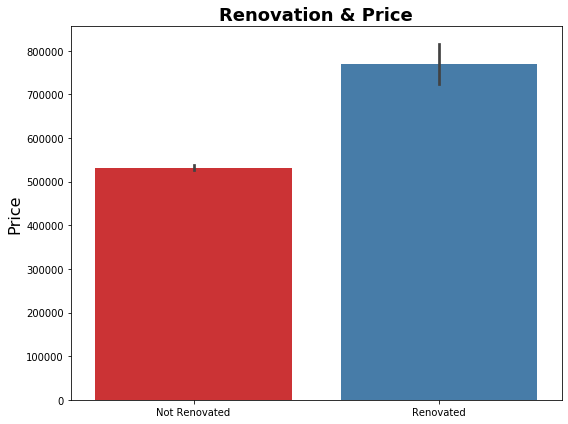

In [116]:
#Create a column with a 0 if the house has not been renovated or a 1 if the house has been renovated


fig = plt.subplots(figsize =(8,6))

df["renovated"] = np.zeros(shape = df.shape[0])

years = []

for year in df.yr_renovated:
    if year != 0:
        years.append("Renovated")
    else:
        years.append("Not Renovated")
        
df.renovated = years

sns.barplot(x = 'renovated', y = "price", data =df, palette= "Set1")

plt.title('Renovation & Price', fontweight='bold',fontsize=18)
plt.xlabel('',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.tight_layout()
#plt.savefig("Renovation_Price.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")

In [117]:
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      2014  221900.0         3       1.00         1180      5650     1.0   
1      2014  538000.0         3       2.25         2570      7242     2.0   
2      2015  180000.0         2       1.00          770     10000     1.0   
3      2014  604000.0         4       3.00         1960      5000     1.0   
4      2015  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21592  2014  360000.0         3       2.50         1530      1131     3.0   
21593  2015  400000.0         4       2.50         2310      5813     2.0   
21594  2014  402101.0         2       0.75         1020      1350     2.0   
21595  2015  400000.0         3       2.50         1600      2388     2.0   
21596  2014  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0             0.0   0.0          3  ...        1180              0      1955   
1             0.0   0.0          3  ...        2170            400      1951   
2             0.0   0.0          3  ...         770              0      1933   
3             0.0   0.0          5  ...        1050            910      1965   
4             0.0   0.0          3  ...        1680              0      1987   
...           ...   ...        ...  ...         ...            ...       ...   
21592         0.0   0.0          3  ...        1530              0      2009   
21593         0.0   0.0          3  ...        2310              0      2014   
21594         0.0   0.0          3  ...        1020              0      2009   
21595         0.0   0.0          3  ...        1600              0      2004   
21596         0.0   0.0          3  ...        1020              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0.0    98178  47.5112 -122.257           1340        5650   
1            1991.0    98125  47.7210 -122.319           1690        7639   
2               0.0    98028  47.7379 -122.233           2720        8062   
3               0.0    98136  47.5208 -122.393           1360        5000   
4               0.0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21592           0.0    98103  47.6993 -122.346           1530        1509   
21593           0.0    98146  47.5107 -122.362           1830        7200   
21594           0.0    98144  47.5944 -122.299           1020        2007   
21595           0.0    98027  47.5345 -122.069           1410        1287   
21596           0.0    98144  47.5941 -122.299           1020        1357   

           renovated  
0      Not Renovated  
1          Renovated  
2      Not Renovated  
3      Not Renovated  
4      Not Renovated  
...              ...  
21592  Not Renovated  
21593  Not Renovated  
21594  Not Renovated  
21595  Not Renovated  
21596  Not Renovated  

[21593 rows x 21 columns]

In [118]:
# drop yr_renovated features i dont need it
df.drop("yr_renovated", axis =1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      2014  221900.0         3       1.00         1180      5650     1.0   
1      2014  538000.0         3       2.25         2570      7242     2.0   
2      2015  180000.0         2       1.00          770     10000     1.0   
3      2014  604000.0         4       3.00         1960      5000     1.0   
4      2015  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21592  2014  360000.0         3       2.50         1530      1131     3.0   
21593  2015  400000.0         4       2.50         2310      5813     2.0   
21594  2014  402101.0         2       0.75         1020      1350     2.0   
21595  2015  400000.0         3       2.50         1600      2388     2.0   
21596  2014  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0          3      7        1180              0   
1             0.0   0.0          3      7        2170            400   
2             0.0   0.0          3      6         770              0   
3             0.0   0.0          5      7        1050            910   
4             0.0   0.0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592         0.0   0.0          3      8        1530              0   
21593         0.0   0.0          3      8        2310              0   
21594         0.0   0.0          3      7        1020              0   
21595         0.0   0.0          3      8        1600              0   
21596         0.0   0.0          3      7        1020              0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          1955    98178  47.5112 -122.257           1340        5650   
1          1951    98125  47.7210 -122.319           1690        7639   
2          1933    98028  47.7379 -122.233           2720        8062   
3          1965    98136  47.5208 -122.393           1360        5000   
4          1987    98074  47.6168 -122.045           1800        7503   
...         ...      ...      ...      ...            ...         ...   
21592      2009    98103  47.6993 -122.346           1530        1509   
21593      2014    98146  47.5107 -122.362           1830        7200   
21594      2009    98144  47.5944 -122.299           1020        2007   
21595      2004    98027  47.5345 -122.069           1410        1287   
21596      2008    98144  47.5941 -122.299           1020        1357   

           renovated  
0      Not Renovated  
1          Renovated  
2      Not Renovated  
3      Not Renovated  
4      Not Renovated  
...              ...  
21592  Not Renovated  
21593  Not Renovated  
21594  Not Renovated  
21595  Not Renovated  
21596  Not Renovated  

[21593 rows x 20 columns]

In [119]:
# make a dataframe
Renovate = pd.DataFrame(index= ["data"])

Renovated = df.loc[(df['renovated'] == "Renovated")]
Not_Renovated = df.loc[(df['renovated'] == "Not Renovated")]

#find mean and median for not renovated
Renovate["mean_Not_Renovated"] = np.round(Not_Renovated['price'].mean())
Renovate["median_Not_Renovated"] = Not_Renovated['price'].median()

#find mean and median for  renovated
Renovate["mean_Renovated"] = np.round(Renovated['price'].mean())
Renovate["median_Renovated"] = Renovated['price'].median()

# see difference between renovated and not renovated

Renovate["Difference"] = Renovate["mean_Renovated"] - Renovate["mean_Not_Renovated"]
Renovate["Percent %"] = ((Renovate["mean_Renovated"] / Renovate["mean_Not_Renovated"].mean())*100)
#Renovate["Difference"] = np.round(Renovated['price'].mean()-Not_Renovated['price'].mean())

Renovate # display the values


mean_Not_Renovated  median_Not_Renovated  mean_Renovated  \
data            532152.0              449000.0        769197.0   

      median_Renovated  Difference   Percent %  
data          610000.0    237045.0  144.544604

## Data Exploration

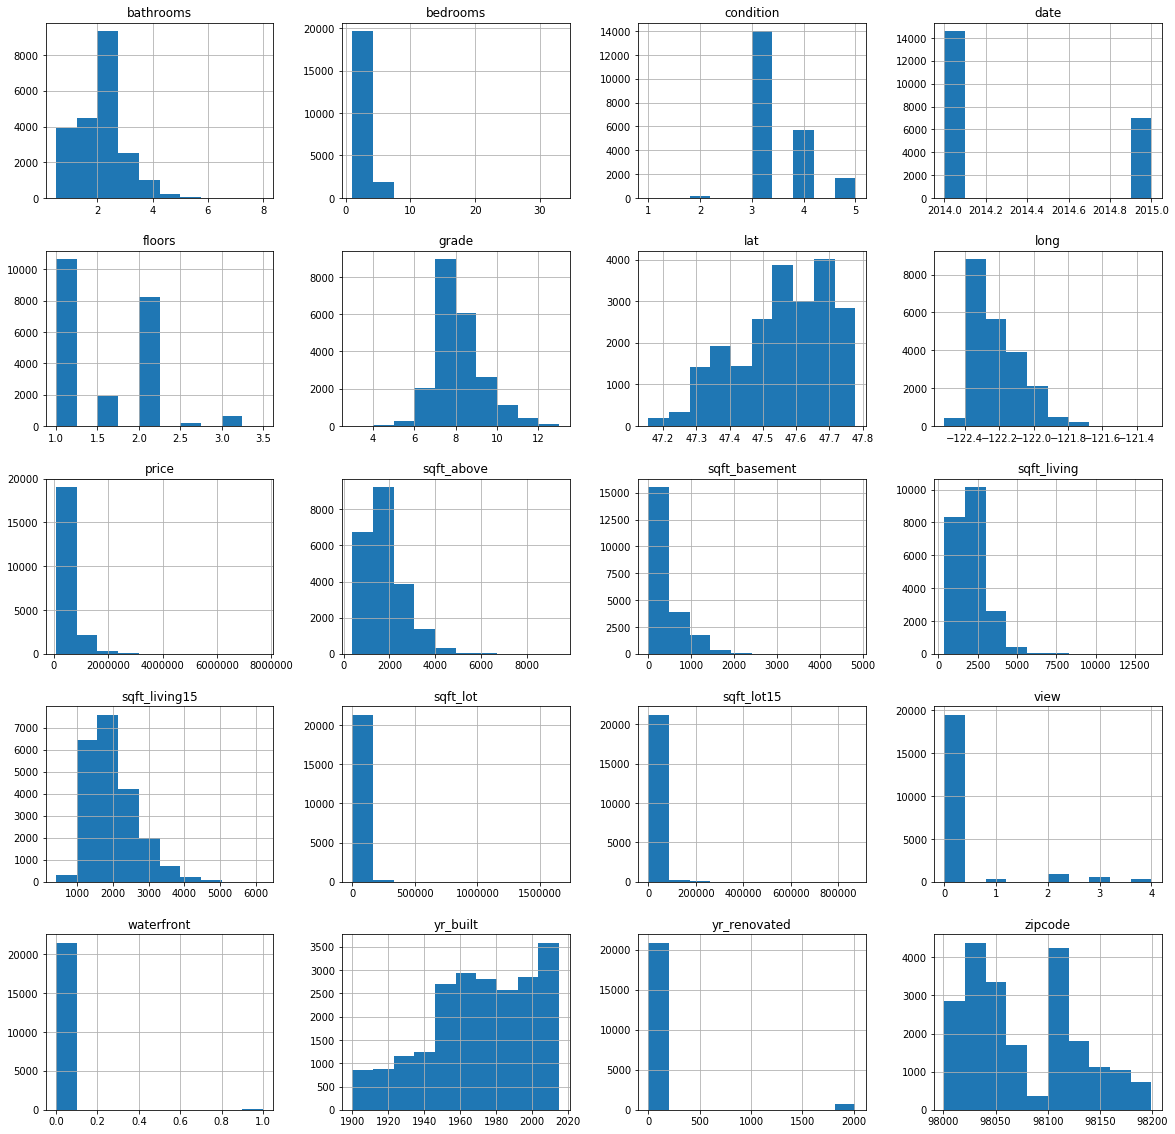

In [120]:
#Here you can see an overview of the data by feature (number of houses in the Y axis):

df.hist(figsize=(20,20));

#plt.savefig("hist.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")


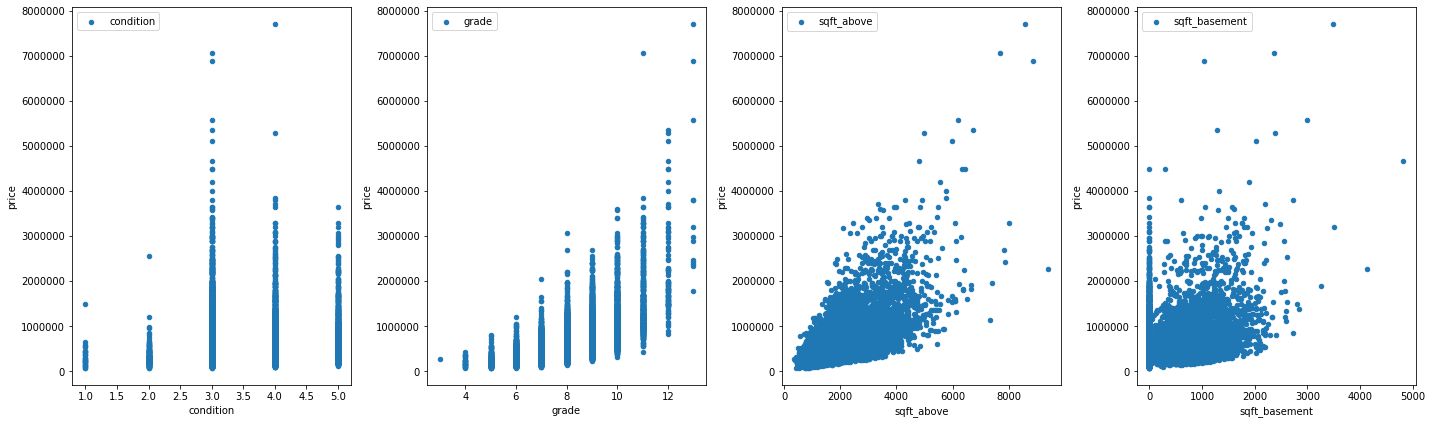

In [121]:
#Here you can see an overview of the data by feature on scatter plot (number of houses in the Y axis):

def eda(featerus):
    
    fig, axes = plt.subplots(nrows = 1, ncols= 4,figsize =(20,6))

    for xcol, ax in zip(featerus, axes):
        df.plot(kind =  "scatter", x = xcol, y = "price",ax = ax, label= xcol)

    plt.tight_layout()
    plt.show()
# 
feateru1 =['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
feateru2 = ['condition', 'grade', 'sqft_above','sqft_basement']
eda(feateru2)


# <a id ="2"> What features of a home affect price the most?</a>

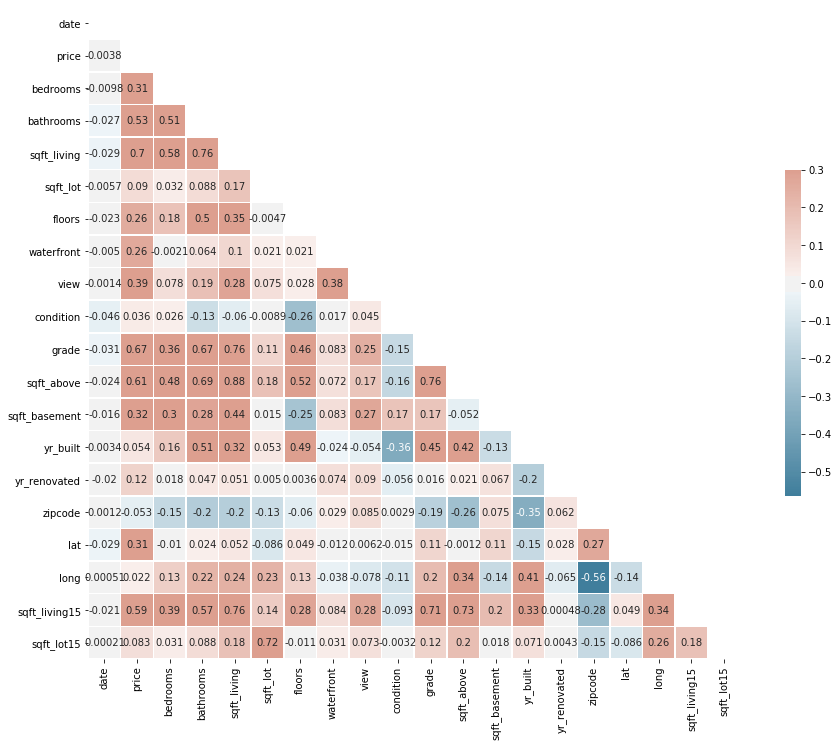

In [122]:

# Compute the correlation matrix
corr= df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (16,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap =True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap =cmap,annot=True, vmax =.3, center =0,
            square =True, linewidths = .5, cbar_kws= {"shrink": .5})
#plt.savefig("Heatmap.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")

# <a id ="3"> Does location affect the price of a home significantly? </a>

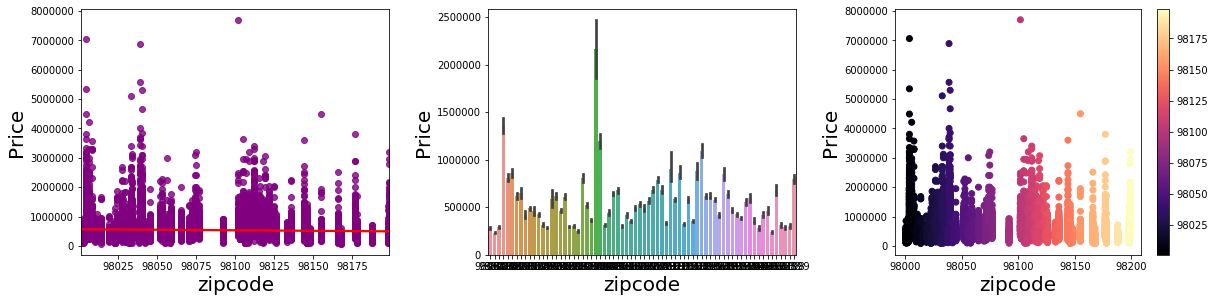

In [123]:


def eda(col): 
    
    plt.rcParams['figure.figsize'] = [8,8]
    fig = plt.figure(figsize=(17,12))
    
    ax1 = fig.add_subplot(331)

    ax1 = fig.add_subplot(331)
    sns.regplot(df[col], df["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
    ax1.set_xlabel(col, size= 20)
    ax1.set_ylabel("Price", size = 20)

    ax2 = fig.add_subplot(332)
    sns.barplot(df[col], df["price"])
    ax2.set_xlabel(col, size= 20)
    ax2.set_ylabel("Price", size = 20)
    
    ax3 = fig.add_subplot(333)
    
    h =ax3.scatter(df[col], df["price"],c=df[col], cmap='magma')
    ax3.set_xlabel(col, size = 20)
    ax3.set_ylabel("Price", size = 20)

    fig.colorbar(h)
    fig.tight_layout()
    plt.show()
columns = ['bedrooms', 'bathrooms', 'sqft_living',  'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15', "zipcode"]

# if we want to see all features
"""for col in columns:
    eda(col)""" 

eda("zipcode")
#eda("bedrooms")



## Dealing with Outliers

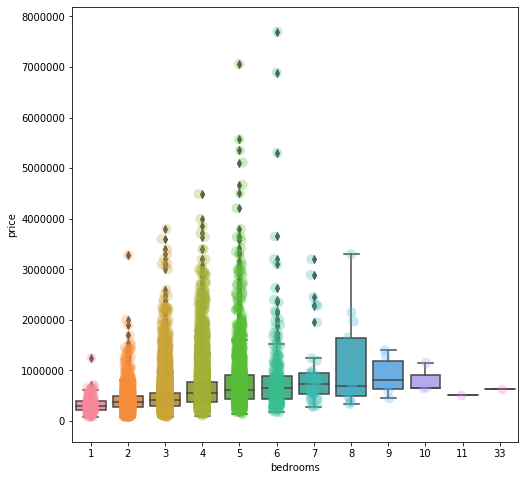

In [124]:
sns.boxplot(x="bedrooms", y="price", data=df)
sns.stripplot(x="bedrooms", y="price", data=df,size=10, alpha=0.3)

##  Data Preparation for Modeling

Dealing with Outliers

In [125]:
df1 = df.copy()

In [126]:
# remove outlier from  features
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_outlier
    print(df_outlier.shape)
df_outlier =outlier(df1)

In [127]:
df_outlier

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      2014  221900.0         3       1.00         1180      5650     1.0   
2      2015  180000.0         2       1.00          770     10000     1.0   
3      2014  604000.0         4       3.00         1960      5000     1.0   
4      2015  510000.0         3       2.00         1680      8080     1.0   
6      2014  257500.0         3       2.25         1715      6819     2.0   
...     ...       ...       ...        ...          ...       ...     ...   
21592  2014  360000.0         3       2.50         1530      1131     3.0   
21593  2015  400000.0         4       2.50         2310      5813     2.0   
21594  2014  402101.0         2       0.75         1020      1350     2.0   
21595  2015  400000.0         3       2.50         1600      2388     2.0   
21596  2014  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0             0.0   0.0          3  ...        1180              0      1955   
2             0.0   0.0          3  ...         770              0      1933   
3             0.0   0.0          5  ...        1050            910      1965   
4             0.0   0.0          3  ...        1680              0      1987   
6             0.0   0.0          3  ...        1715              0      1995   
...           ...   ...        ...  ...         ...            ...       ...   
21592         0.0   0.0          3  ...        1530              0      2009   
21593         0.0   0.0          3  ...        2310              0      2014   
21594         0.0   0.0          3  ...        1020              0      2009   
21595         0.0   0.0          3  ...        1600              0      2004   
21596         0.0   0.0          3  ...        1020              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0.0    98178  47.5112 -122.257           1340        5650   
2               0.0    98028  47.7379 -122.233           2720        8062   
3               0.0    98136  47.5208 -122.393           1360        5000   
4               0.0    98074  47.6168 -122.045           1800        7503   
6               0.0    98003  47.3097 -122.327           2238        6819   
...             ...      ...      ...      ...            ...         ...   
21592           0.0    98103  47.6993 -122.346           1530        1509   
21593           0.0    98146  47.5107 -122.362           1830        7200   
21594           0.0    98144  47.5944 -122.299           1020        2007   
21595           0.0    98027  47.5345 -122.069           1410        1287   
21596           0.0    98144  47.5941 -122.299           1020        1357   

           renovated  
0      Not Renovated  
2      Not Renovated  
3      Not Renovated  
4      Not Renovated  
6      Not Renovated  
...              ...  
21592  Not Renovated  
21593  Not Renovated  
21594  Not Renovated  
21595  Not Renovated  
21596  Not Renovated  

[15013 rows x 21 columns]

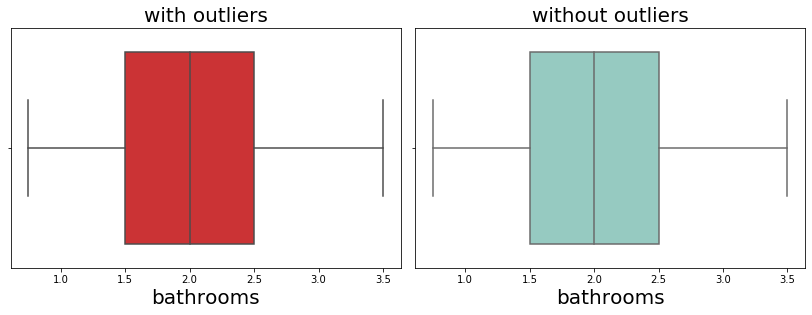

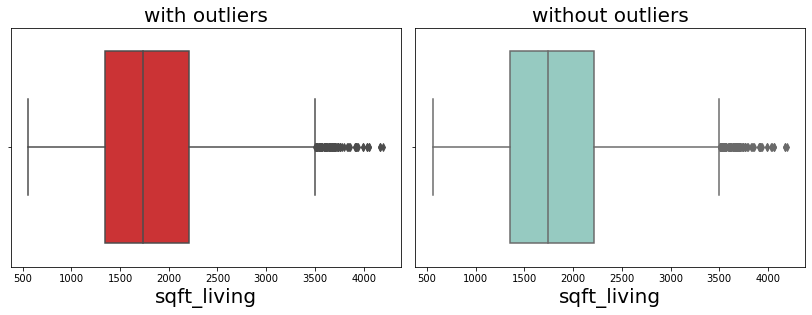

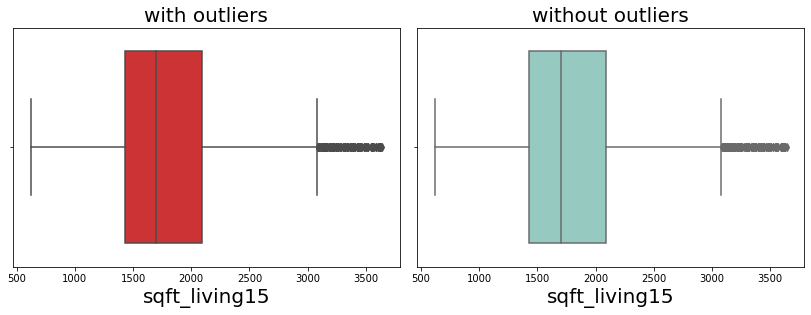

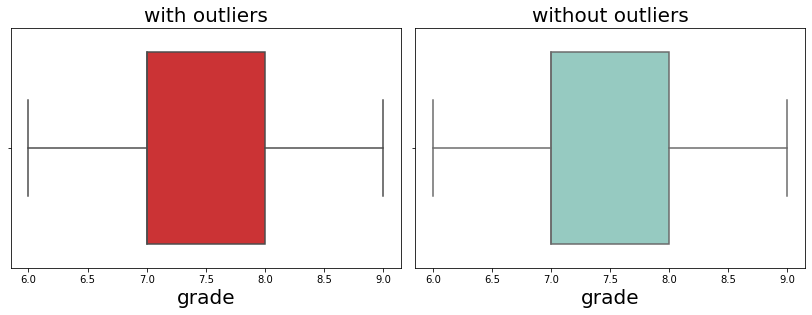

In [128]:
def df_outlier_eda(col): 
    
    plt.rcParams['figure.figsize'] = [8,8]
    fig = plt.figure(figsize=(17,12))
    #fig.suptitle("Exploring The PDFs",y=1.1,fontsize=25,fontweight="bold", color="black", position=(0.5,.99))
    #fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')
    ax1 = fig.add_subplot(331)

    ax1 = fig.add_subplot(331)
    sns.boxplot(df_outlier[col], palette="Set1")
    ax1.set_xlabel(col, size = 20)
    ax1.set_title("with outliers", size = 20)

    ax2 = fig.add_subplot(332)
    sns.boxplot(df_outlier[col],  palette="Set3")
    ax2.set_xlabel(col, size = 20)
    ax2.set_title("without outliers", size = 20)

    fig.tight_layout()
    plt.show()

df_outlier_eda("bathrooms")
df_outlier_eda("sqft_living")
df_outlier_eda("sqft_living15")
df_outlier_eda("grade")

## log-transform

In [129]:
# log transform for y axis: "price"
df_outlier["price"] = np.log(df_outlier["price"])

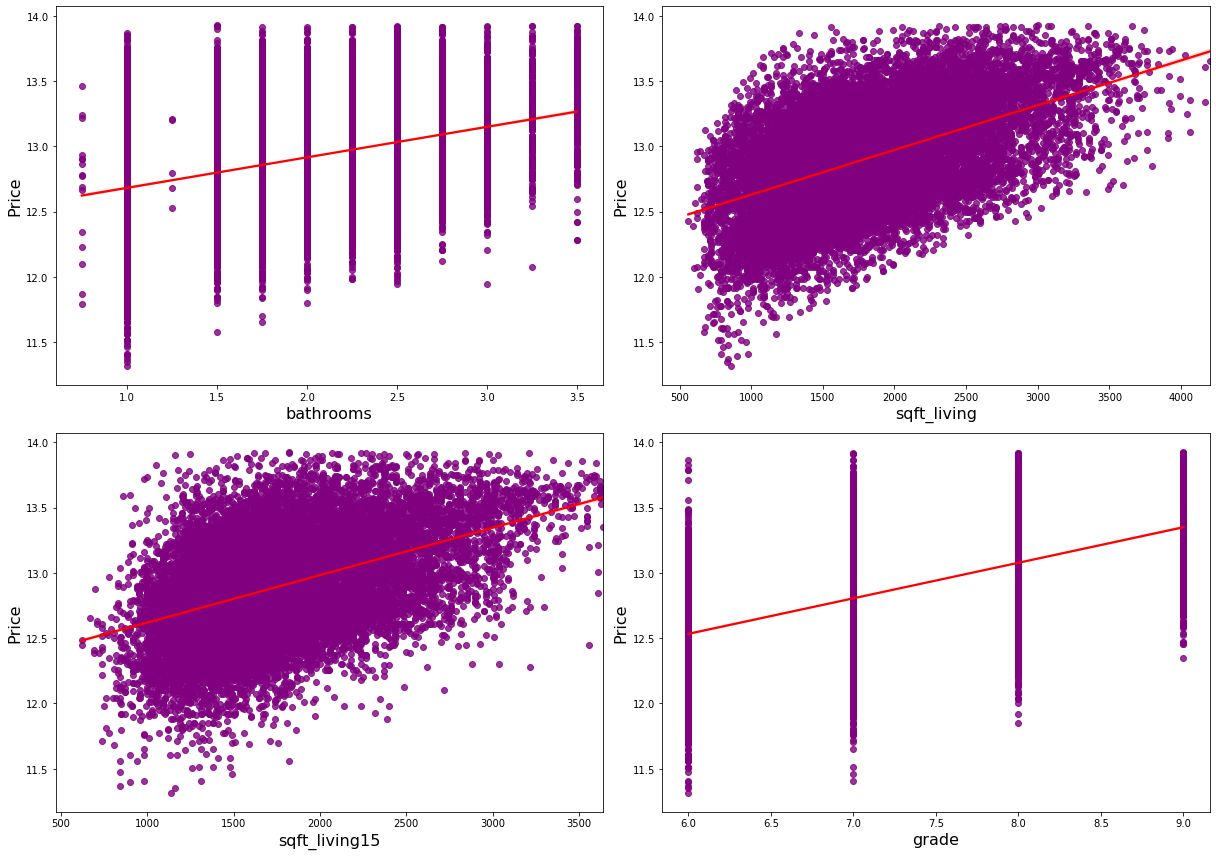

In [130]:

#after log transform, you can see an overview of the data by feature (number of houses in the Y axis):
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.figure(figsize=(17,12))

ax1 = fig.add_subplot(221)

ax1 = fig.add_subplot(221)
sns.regplot(df_outlier["bathrooms"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
ax1.set_xlabel("bathrooms", size= 16)
ax1.set_ylabel("Price", size =16)

ax2 = fig.add_subplot(222)
sns.regplot(df_outlier["sqft_living"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
ax2.set_xlabel("sqft_living", size= 16)
ax2.set_ylabel("Price", size =16)

ax3 = fig.add_subplot(223)

sns.regplot(df_outlier["sqft_living15"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
ax3.set_xlabel("sqft_living15", size= 16)
ax3.set_ylabel("Price", size =16)

ax4 = fig.add_subplot(224)

sns.regplot(df_outlier["grade"], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
ax4.set_xlabel("grade", size= 16)
ax4.set_ylabel("Price", size =16)

fig.tight_layout()
plt.show()


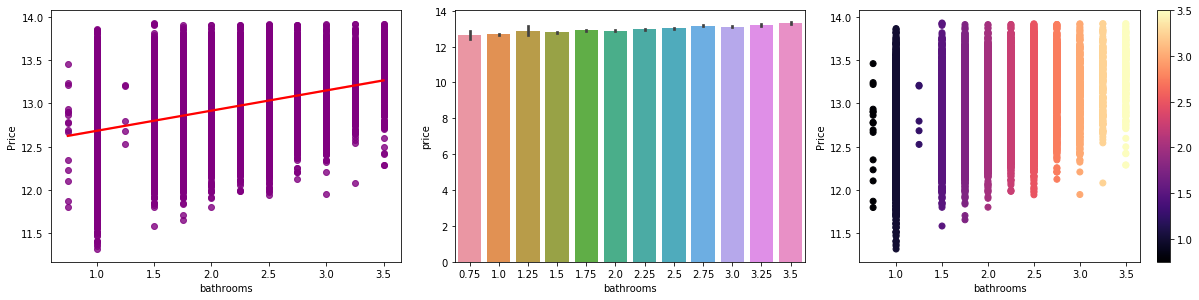

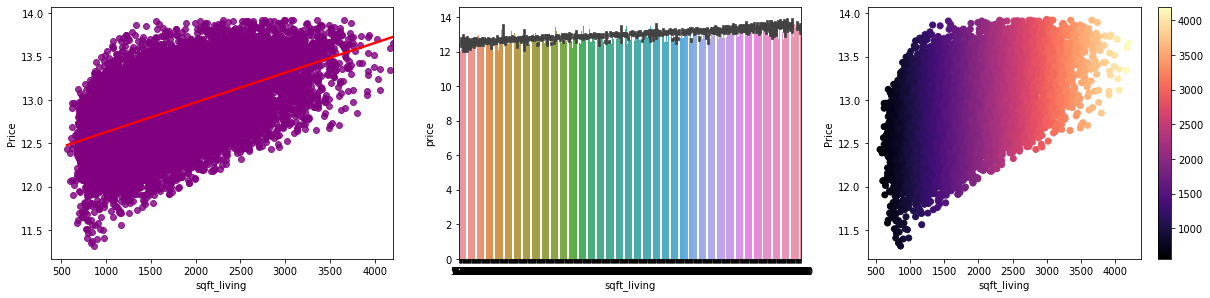

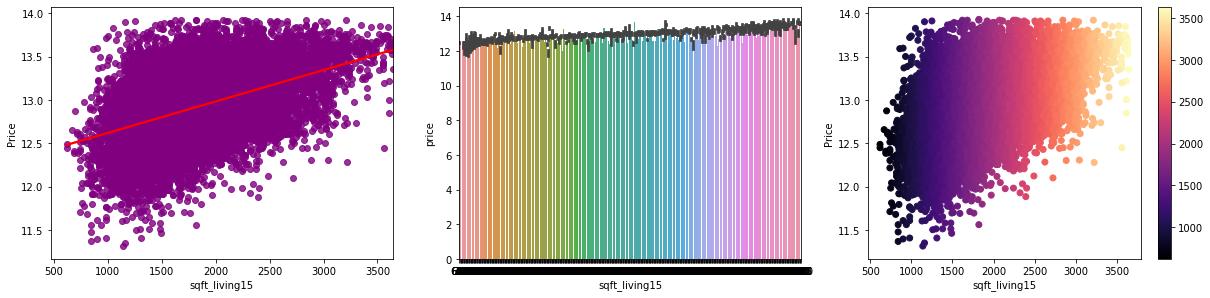

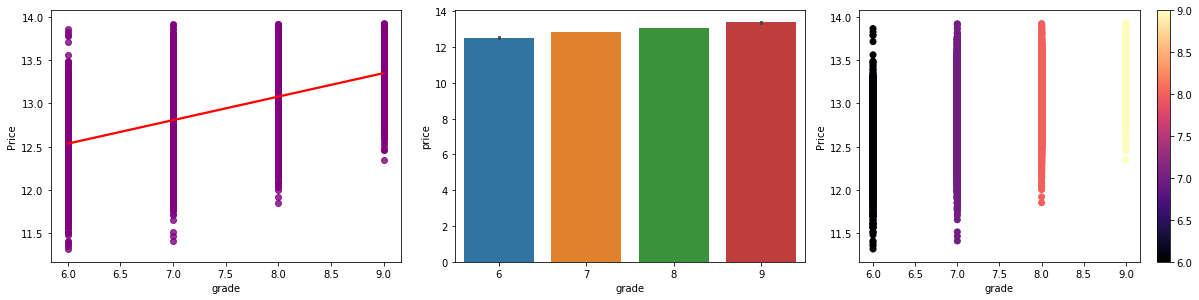

In [131]:
# look more data how our features after outlier and log transform
def df_outlier_eda(col): 
    
    plt.rcParams['figure.figsize'] = [8,8]
    fig = plt.figure(figsize=(17,12))
    
    ax1 = fig.add_subplot(331)

    ax1 = fig.add_subplot(331)
    sns.regplot(df_outlier[col], df_outlier["price"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
    ax1.set_xlabel(col)
    ax1.set_ylabel("Price")

    ax2 = fig.add_subplot(332)
    sns.barplot(df_outlier[col], df_outlier["price"])
    
    ax3 = fig.add_subplot(333)
    
    h =ax3.scatter(df_outlier[col], df_outlier["price"],c=df_outlier[col], cmap='magma')
    ax3.set_xlabel(col)
    ax3.set_ylabel("Price")


    

    fig.colorbar(h)
    fig.tight_layout()
    plt.show()
columns = ['bedrooms', 'bathrooms', 'sqft_living',  'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'renovated', 
       'sqft_living15', 'sqft_lot15']
"""for col in columns:
    df_outlier_eda(col)"""

df_outlier_eda("bathrooms")
df_outlier_eda("sqft_living")
df_outlier_eda("sqft_living15")
df_outlier_eda("grade")
#eda("grade")

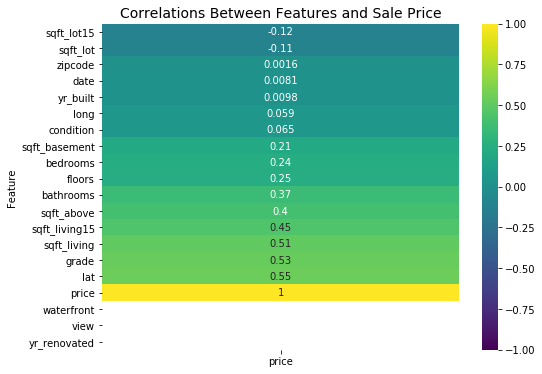

In [132]:
# cheking if there is anything change after outleirs and log tranform

corr_matrix = df_outlier.corr()[['price']].sort_values('price')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Features and Sale Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

In [133]:
# our correlations feature and the features i consider to use for my model
feats = ['bathrooms', 'sqft_living', 'sqft_living15',
        'grade', 'sqft_above']
       

# <a id ="4"> Is it possible to create a model that accuratly predicts the sales price of a home? </a>

# Model

In order to be able to build a model to predict the sales price of a home, I will use the multiple linear regression analysis. However, there are a few assumptions that need to be met in order to be able to generate a model using this method: no multicollinearity; linear relationship between dependent and independent variables; homoscedasticity of error terms; and normal distribution of model residuals. In preparation for generating the models I looked into some of these properties to ensure the data will meet all the necessary standards of the multiple linear regression analysis:

In [134]:
# our target and features values
feat = df_outlier[['price','bathrooms', 'sqft_living', 'sqft_living15',
        'grade', 'sqft_above', 'zipcode']]
#turning zipcode to categrical value
cat = pd.get_dummies(feat['zipcode'],prefix = "zipcode", drop_first=True) #drop a column to avoid dummy variable trap
feat = feat.drop('zipcode',axis = 1)
feat = feat.join(cat) 
feat


price  bathrooms  sqft_living  sqft_living15  grade  sqft_above  \
0      12.309982       1.00         1180           1340      7        1180   
2      12.100712       1.00          770           2720      6         770   
3      13.311329       3.00         1960           1360      7        1050   
4      13.142166       2.00         1680           1800      8        1680   
6      12.458775       2.25         1715           2238      7        1715   
...          ...        ...          ...            ...    ...         ...   
21592  12.793859       2.50         1530           1530      8        1530   
21593  12.899220       2.50         2310           1830      8        2310   
21594  12.904459       0.75         1020           1020      7        1020   
21595  12.899220       2.50         1600           1410      8        1600   
21596  12.691580       0.75         1020           1020      7        1020   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  ...  \
0                  0              0              0              0  ...   
2                  0              0              0              0  ...   
3                  0              0              0              0  ...   
4                  0              0              0              0  ...   
6                  0              1              0              0  ...   
...              ...            ...            ...            ...  ...   
21592              0              0              0              0  ...   
21593              0              0              0              0  ...   
21594              0              0              0              0  ...   
21595              0              0              0              0  ...   
21596              0              0              0              0  ...   

       zipcode_98146  zipcode_98148  zipcode_98155  zipcode_98166  \
0                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
6                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              1              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0                  0              0              1              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
6                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98198  zipcode_98199  
0                  0              0  
2                  0              0  
3                  0              0  
4                  0              0  
6                  0              0  
...              ...            ...  
21592              0              0  
21593              0              0  
21594              0              0  
21595              0              0  
21596              0              0  

[15013 rows x 74 columns]

In [135]:

#checking multicollinear

features = []
correlations = []
Corr_price = pd.DataFrame()


for idx, cor in corr['price'].T.iteritems():
    if cor>= 0.3 and idx !="price":
        features.append(idx)
        correlations.append(cor) 
Corr_price['Correlations']= correlations
Corr_price['features']= features


Multicollinear_Features = []
Multicollinear_Corr = []
Multicollinear_Corr_df = pd.DataFrame()

def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)
display(MC_df)

Correlations                   Features
0      0.876442  [sqft_living, sqft_above]
1      0.876442  [sqft_above, sqft_living]

In [136]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;
 

<Figure size 576x576 with 0 Axes>

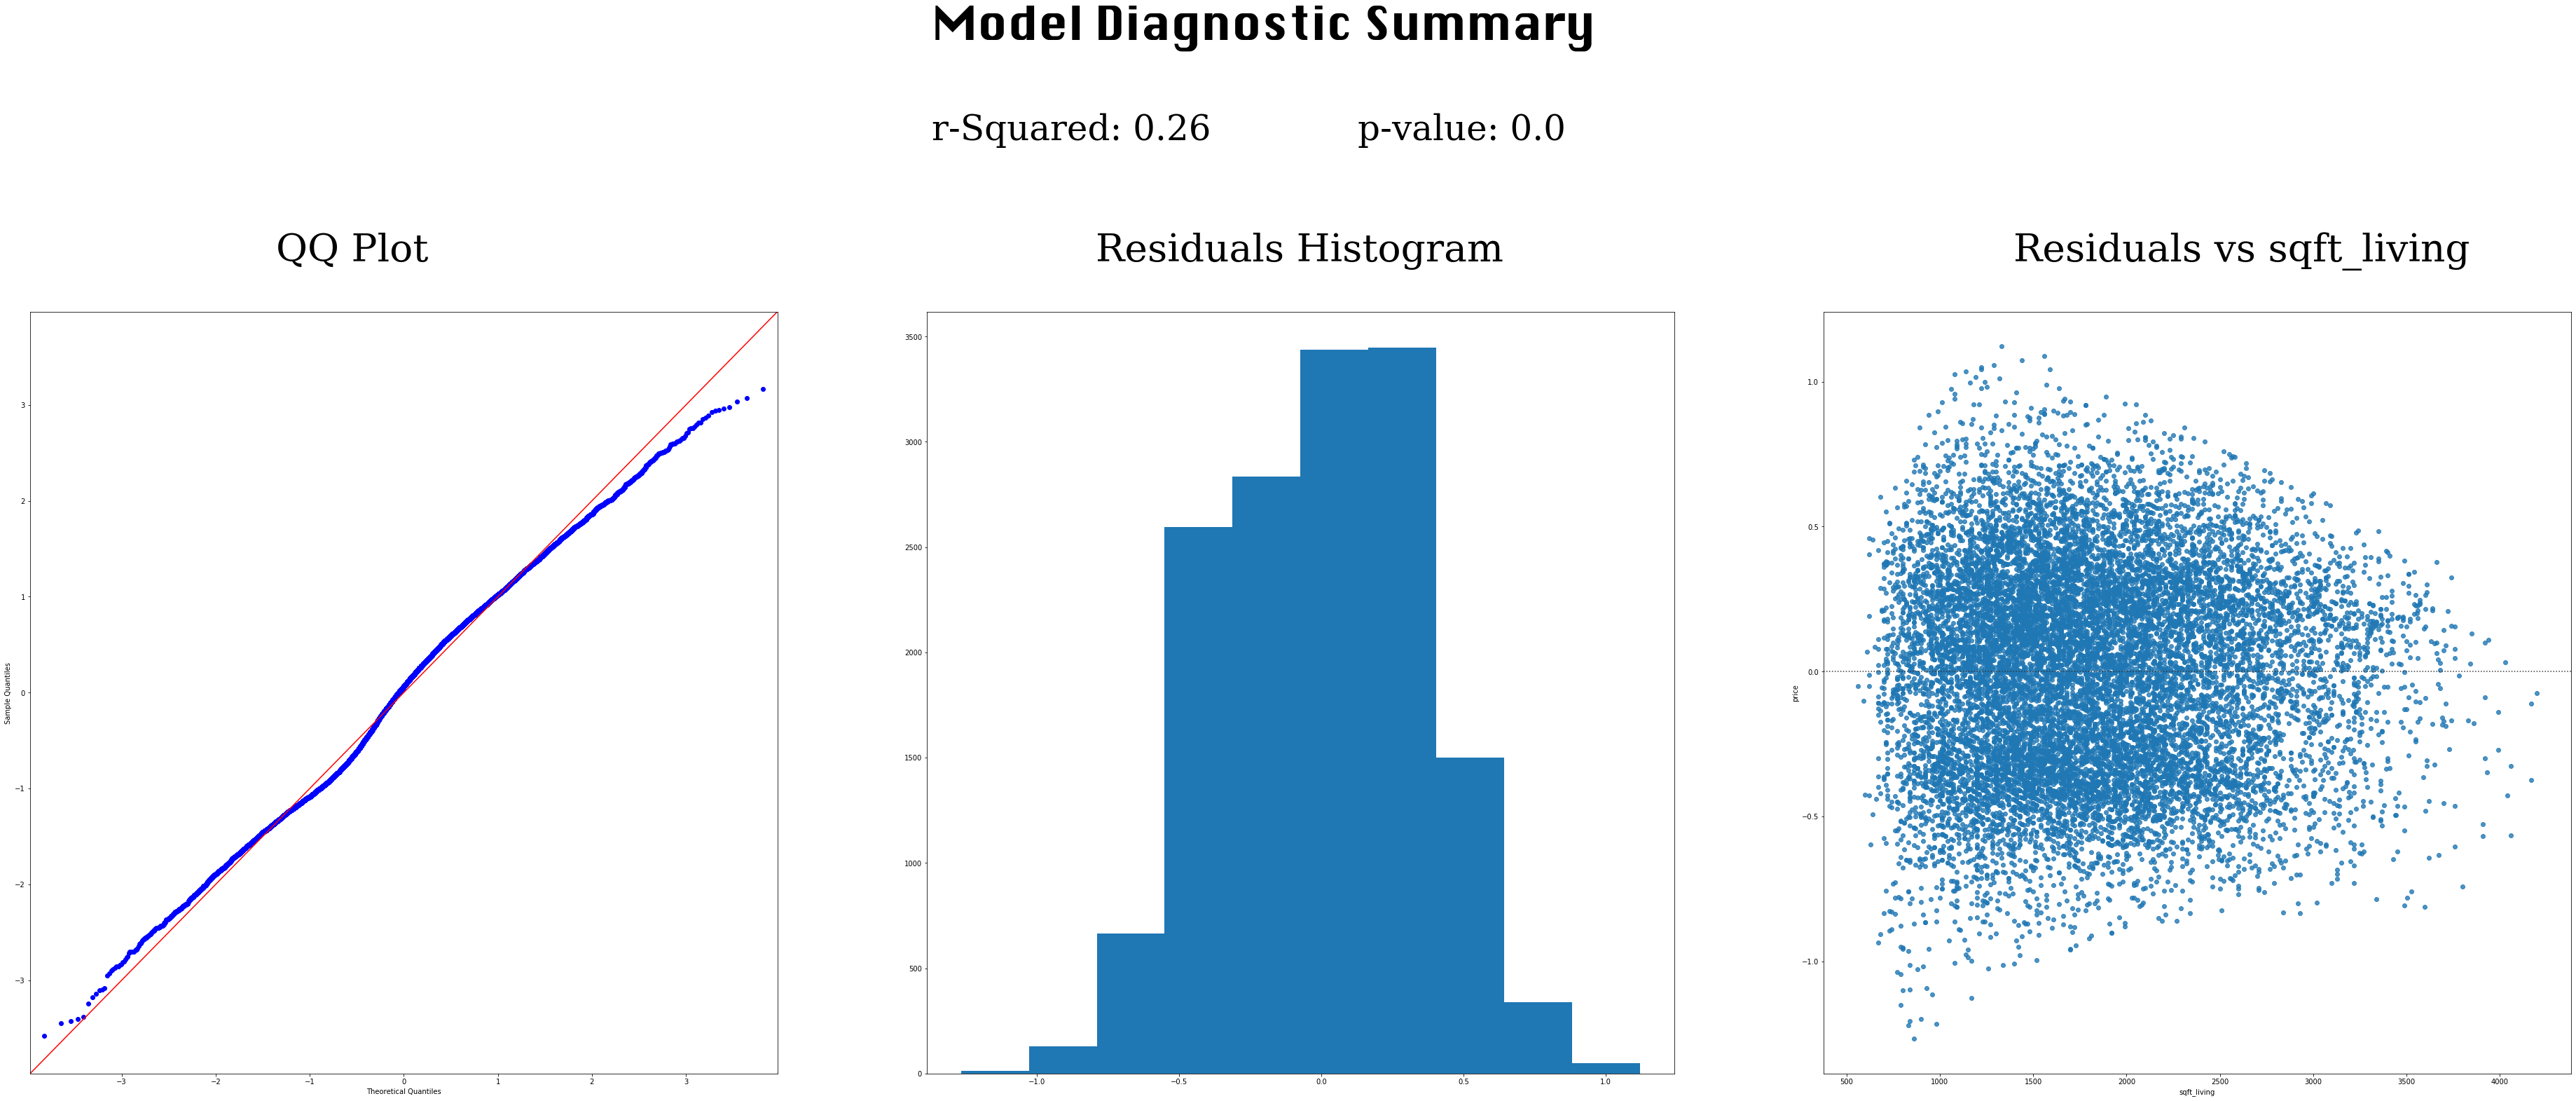

In [137]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["sqft_living"], 'sqft_living', feat["price"])

In [138]:
feat['sqft_living'] = np.log(feat['sqft_living'])

<Figure size 576x576 with 0 Axes>

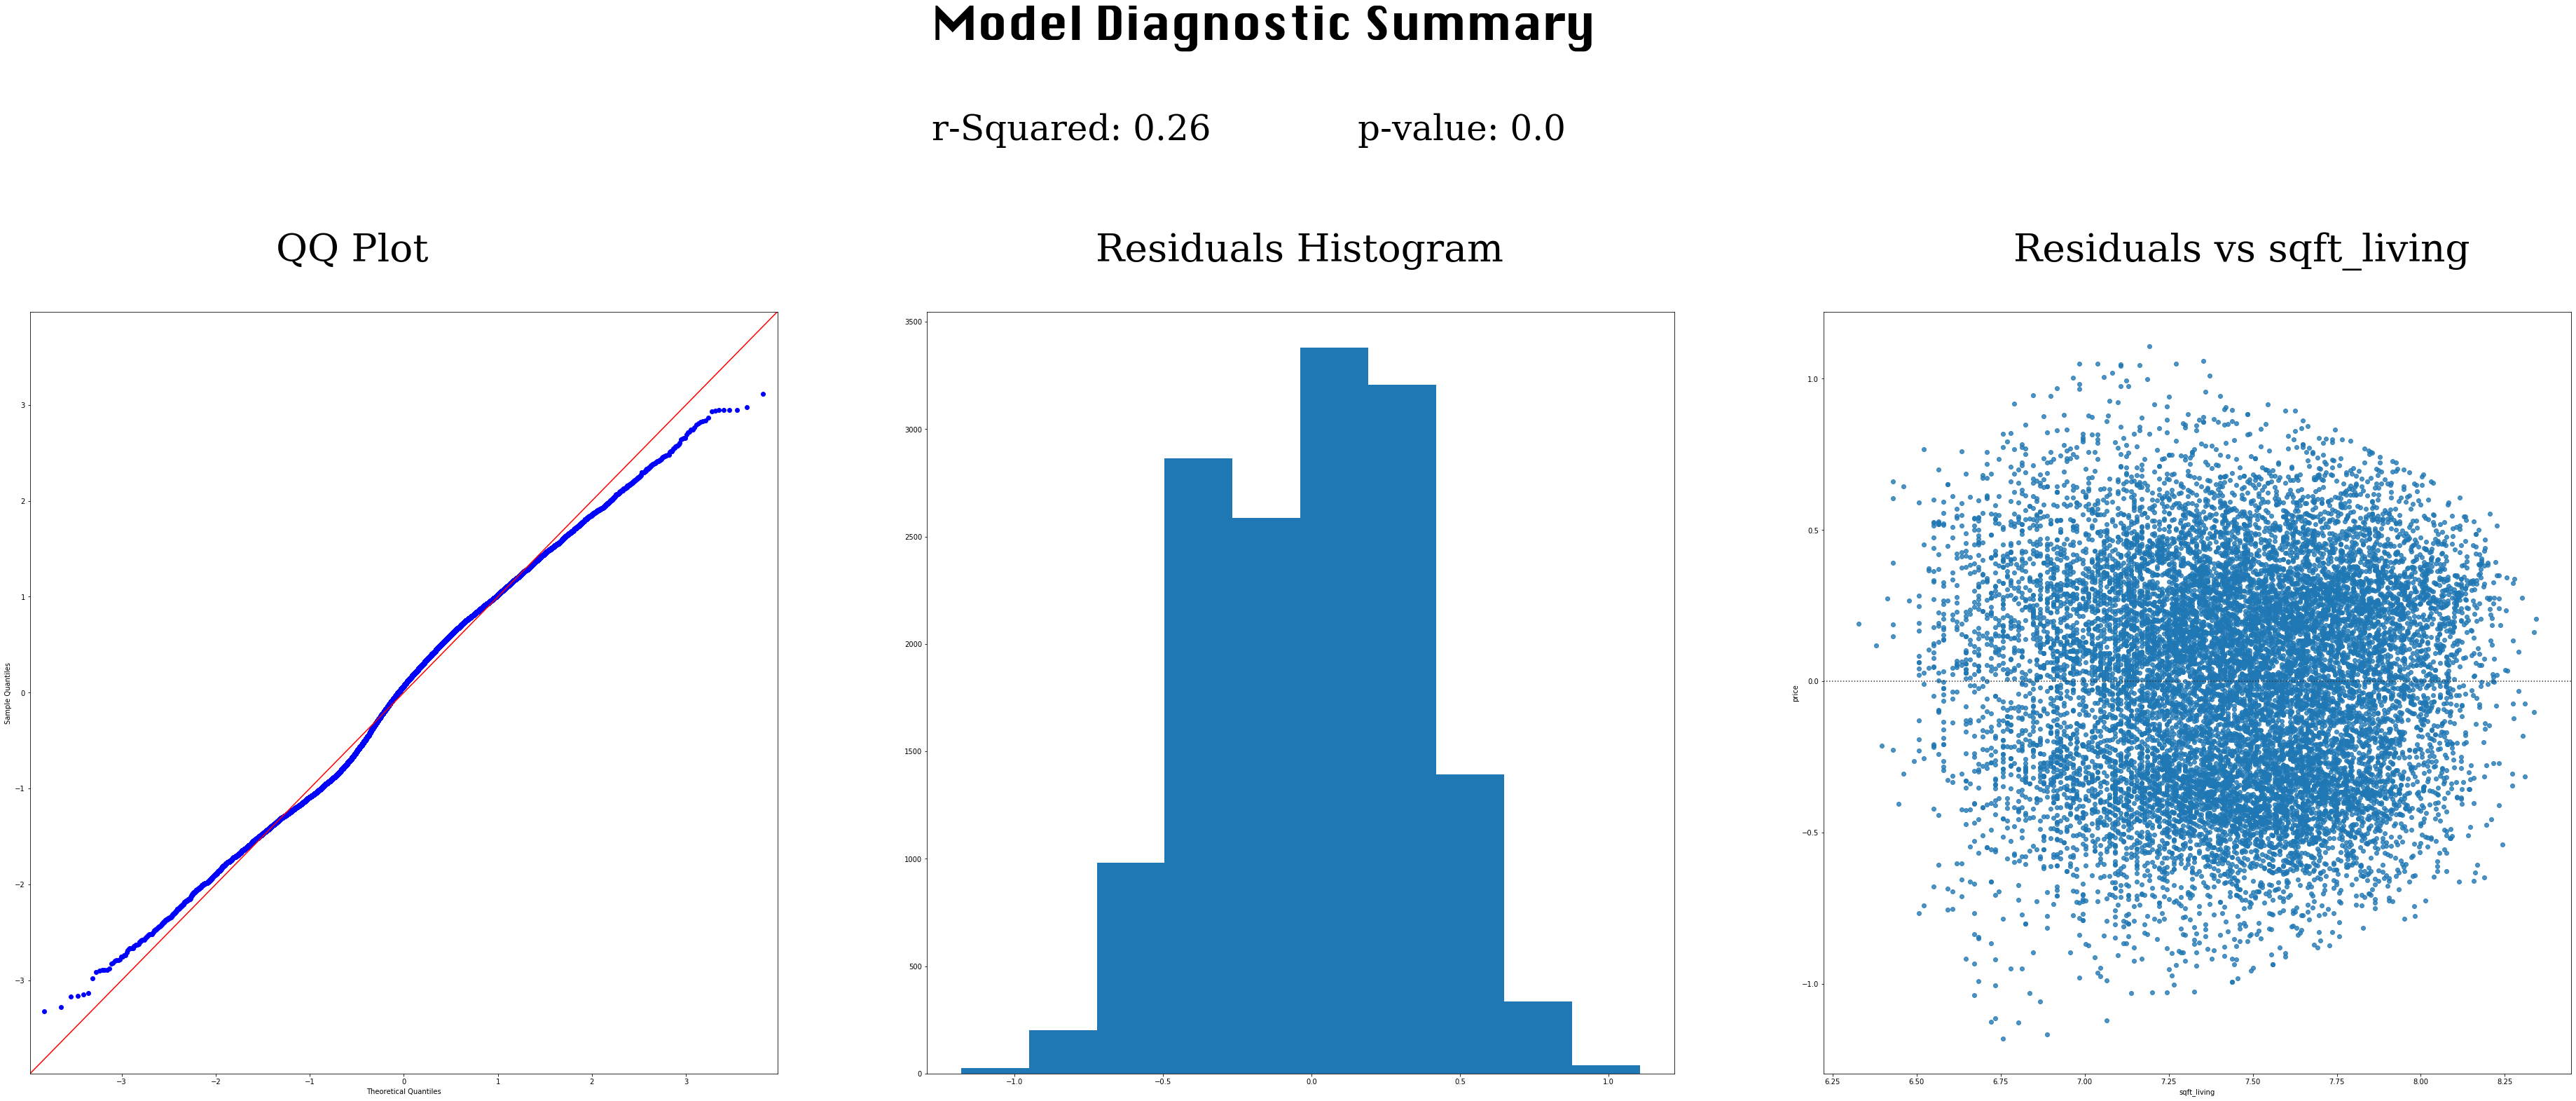

In [139]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat['sqft_living'], 'sqft_living', feat["price"])

<Figure size 576x576 with 0 Axes>

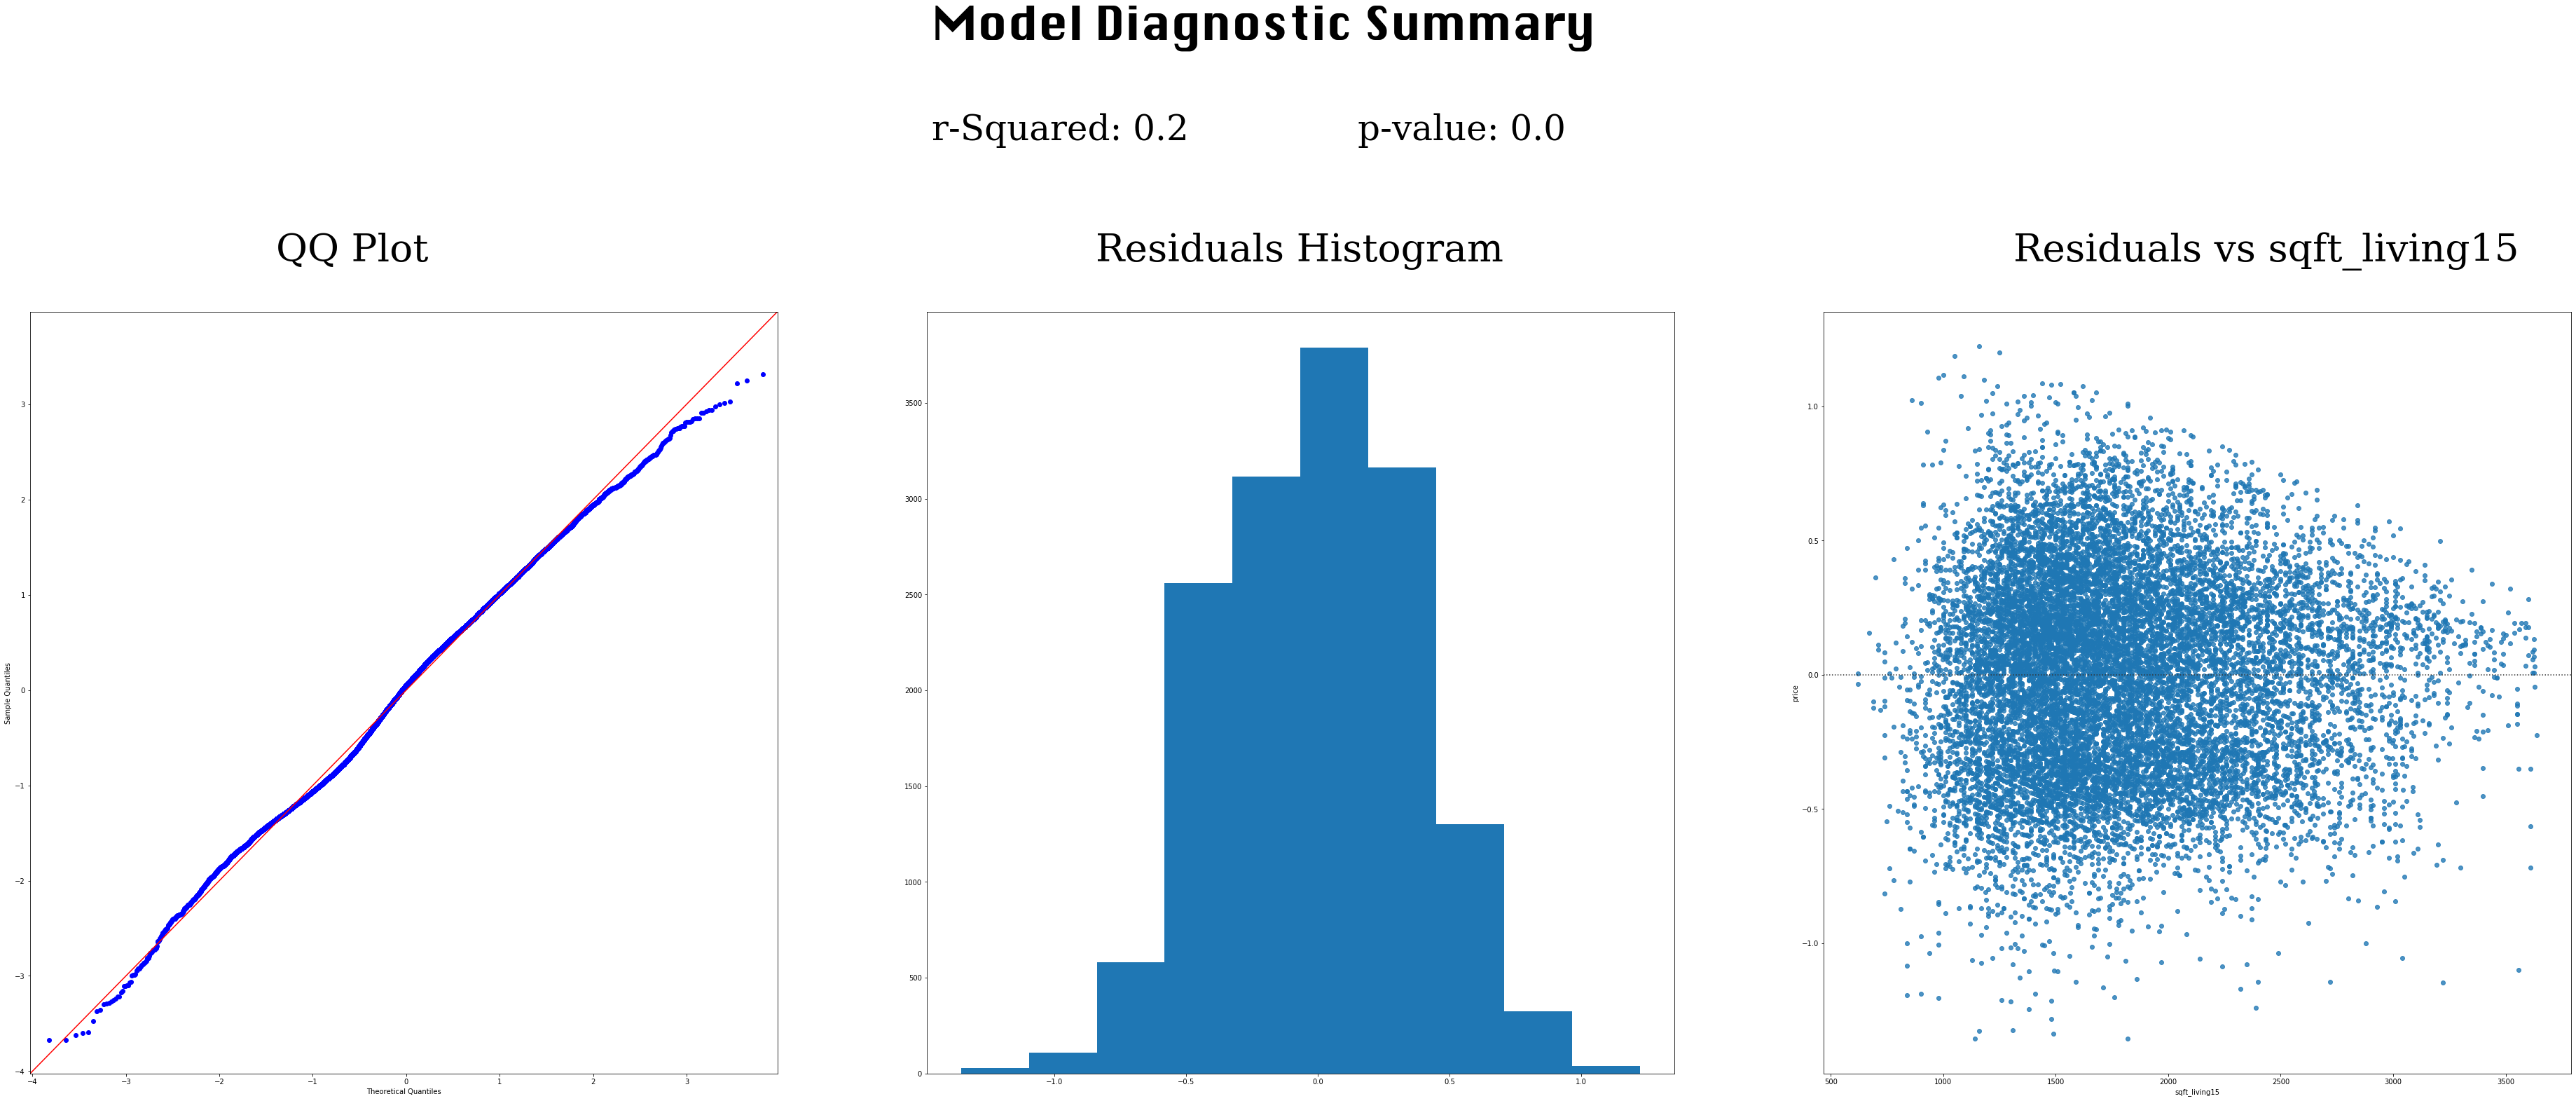

In [140]:
f = 'price~sqft_living15'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["sqft_living15"], 'sqft_living15', feat["price"])

<Figure size 576x576 with 0 Axes>

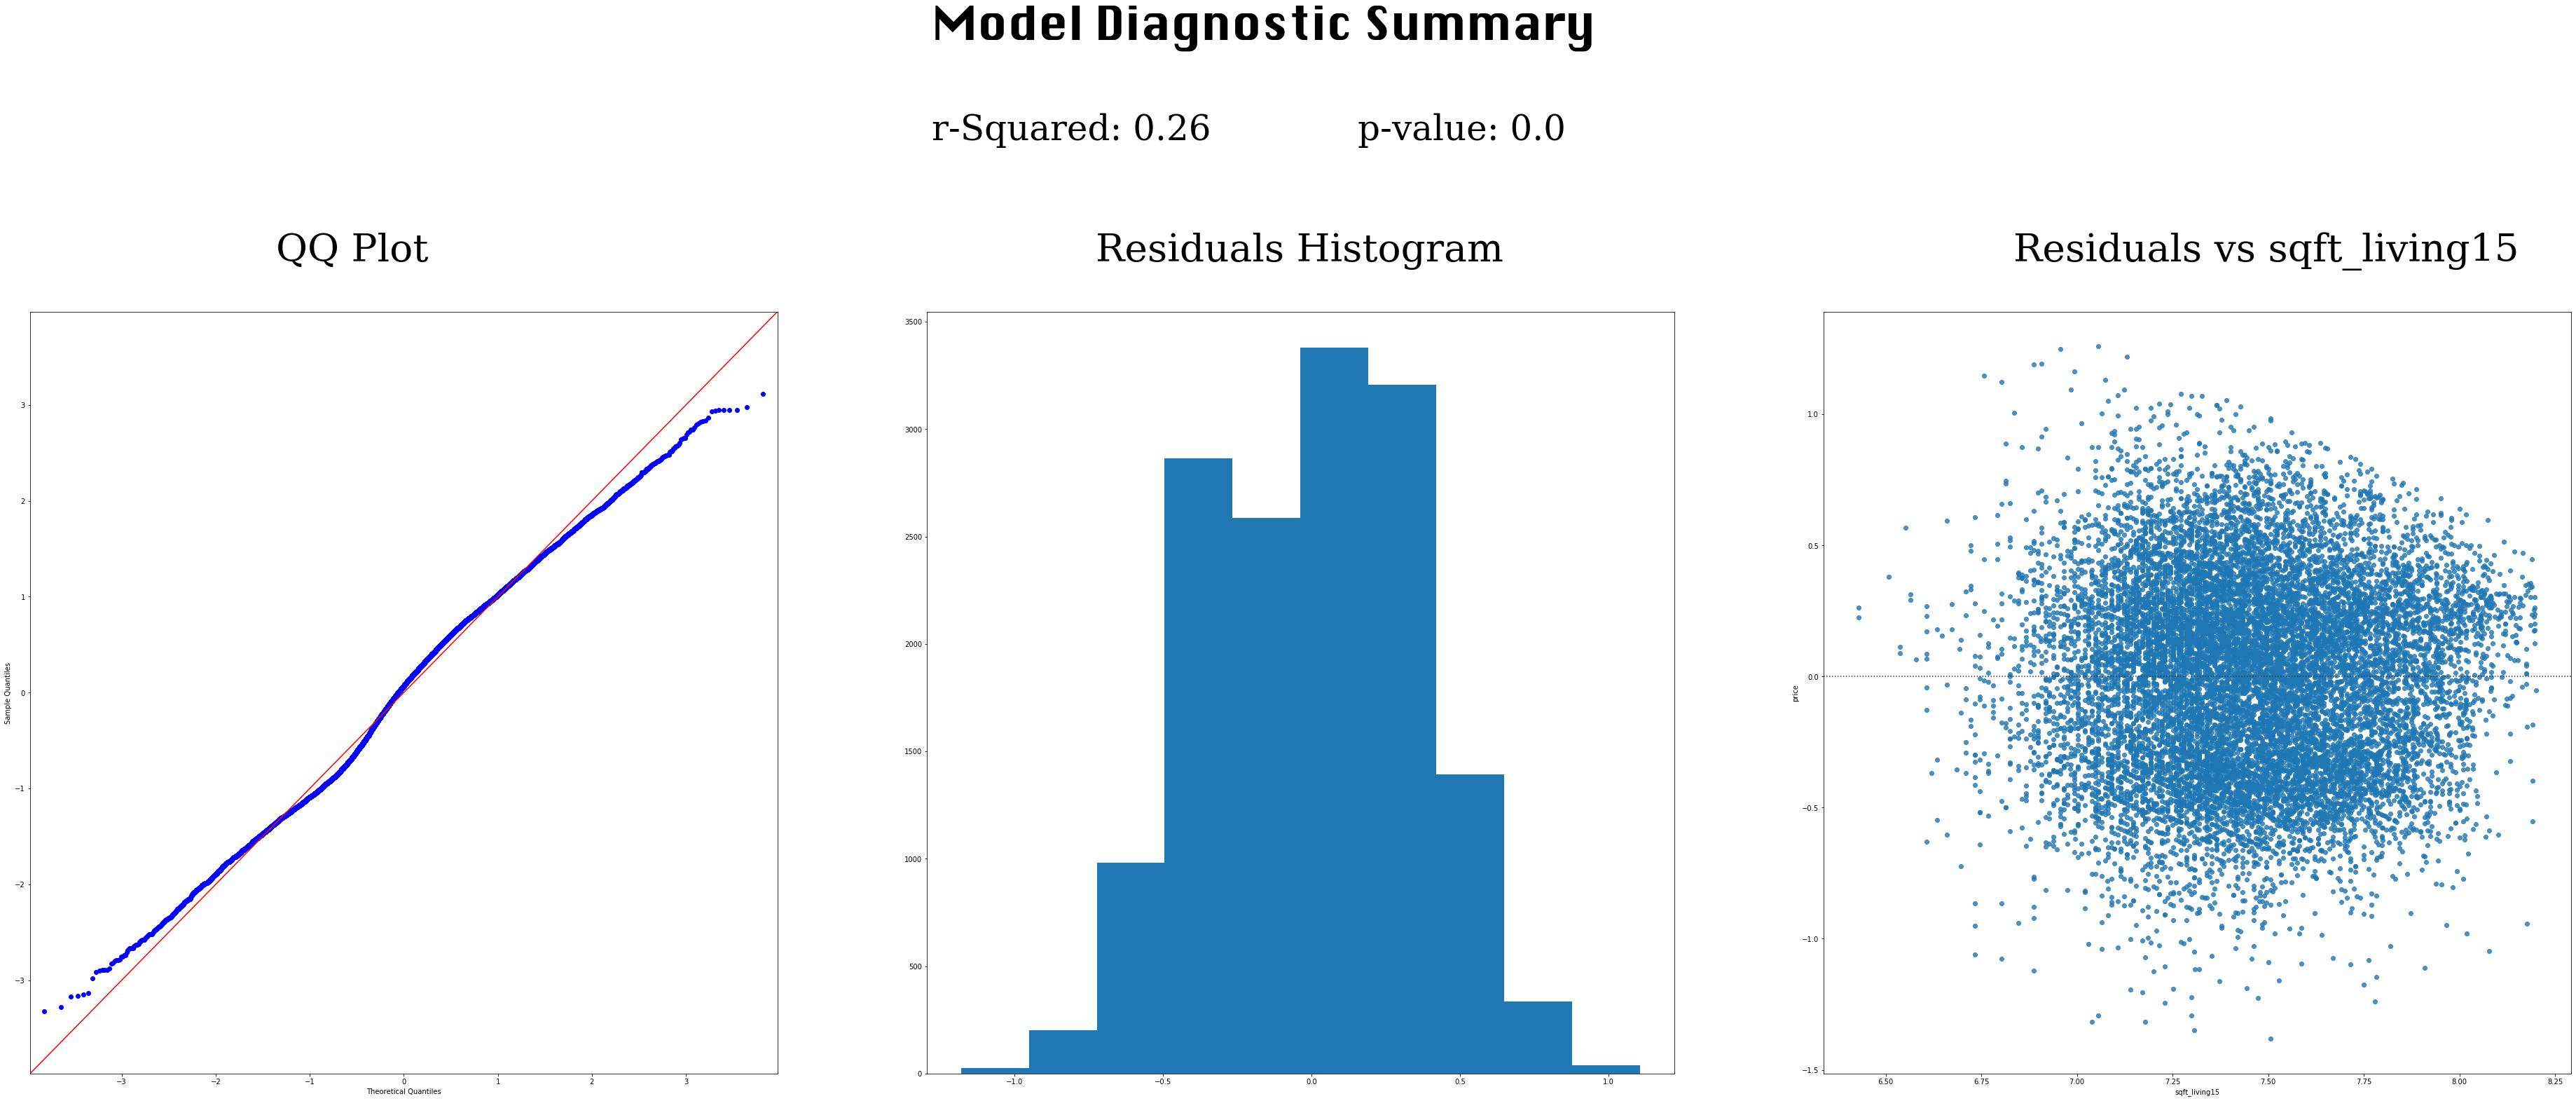

In [141]:
feat['sqft_living15'] = np.log(feat['sqft_living15'])
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat['sqft_living15'], 'sqft_living15', feat["price"])

<Figure size 576x576 with 0 Axes>

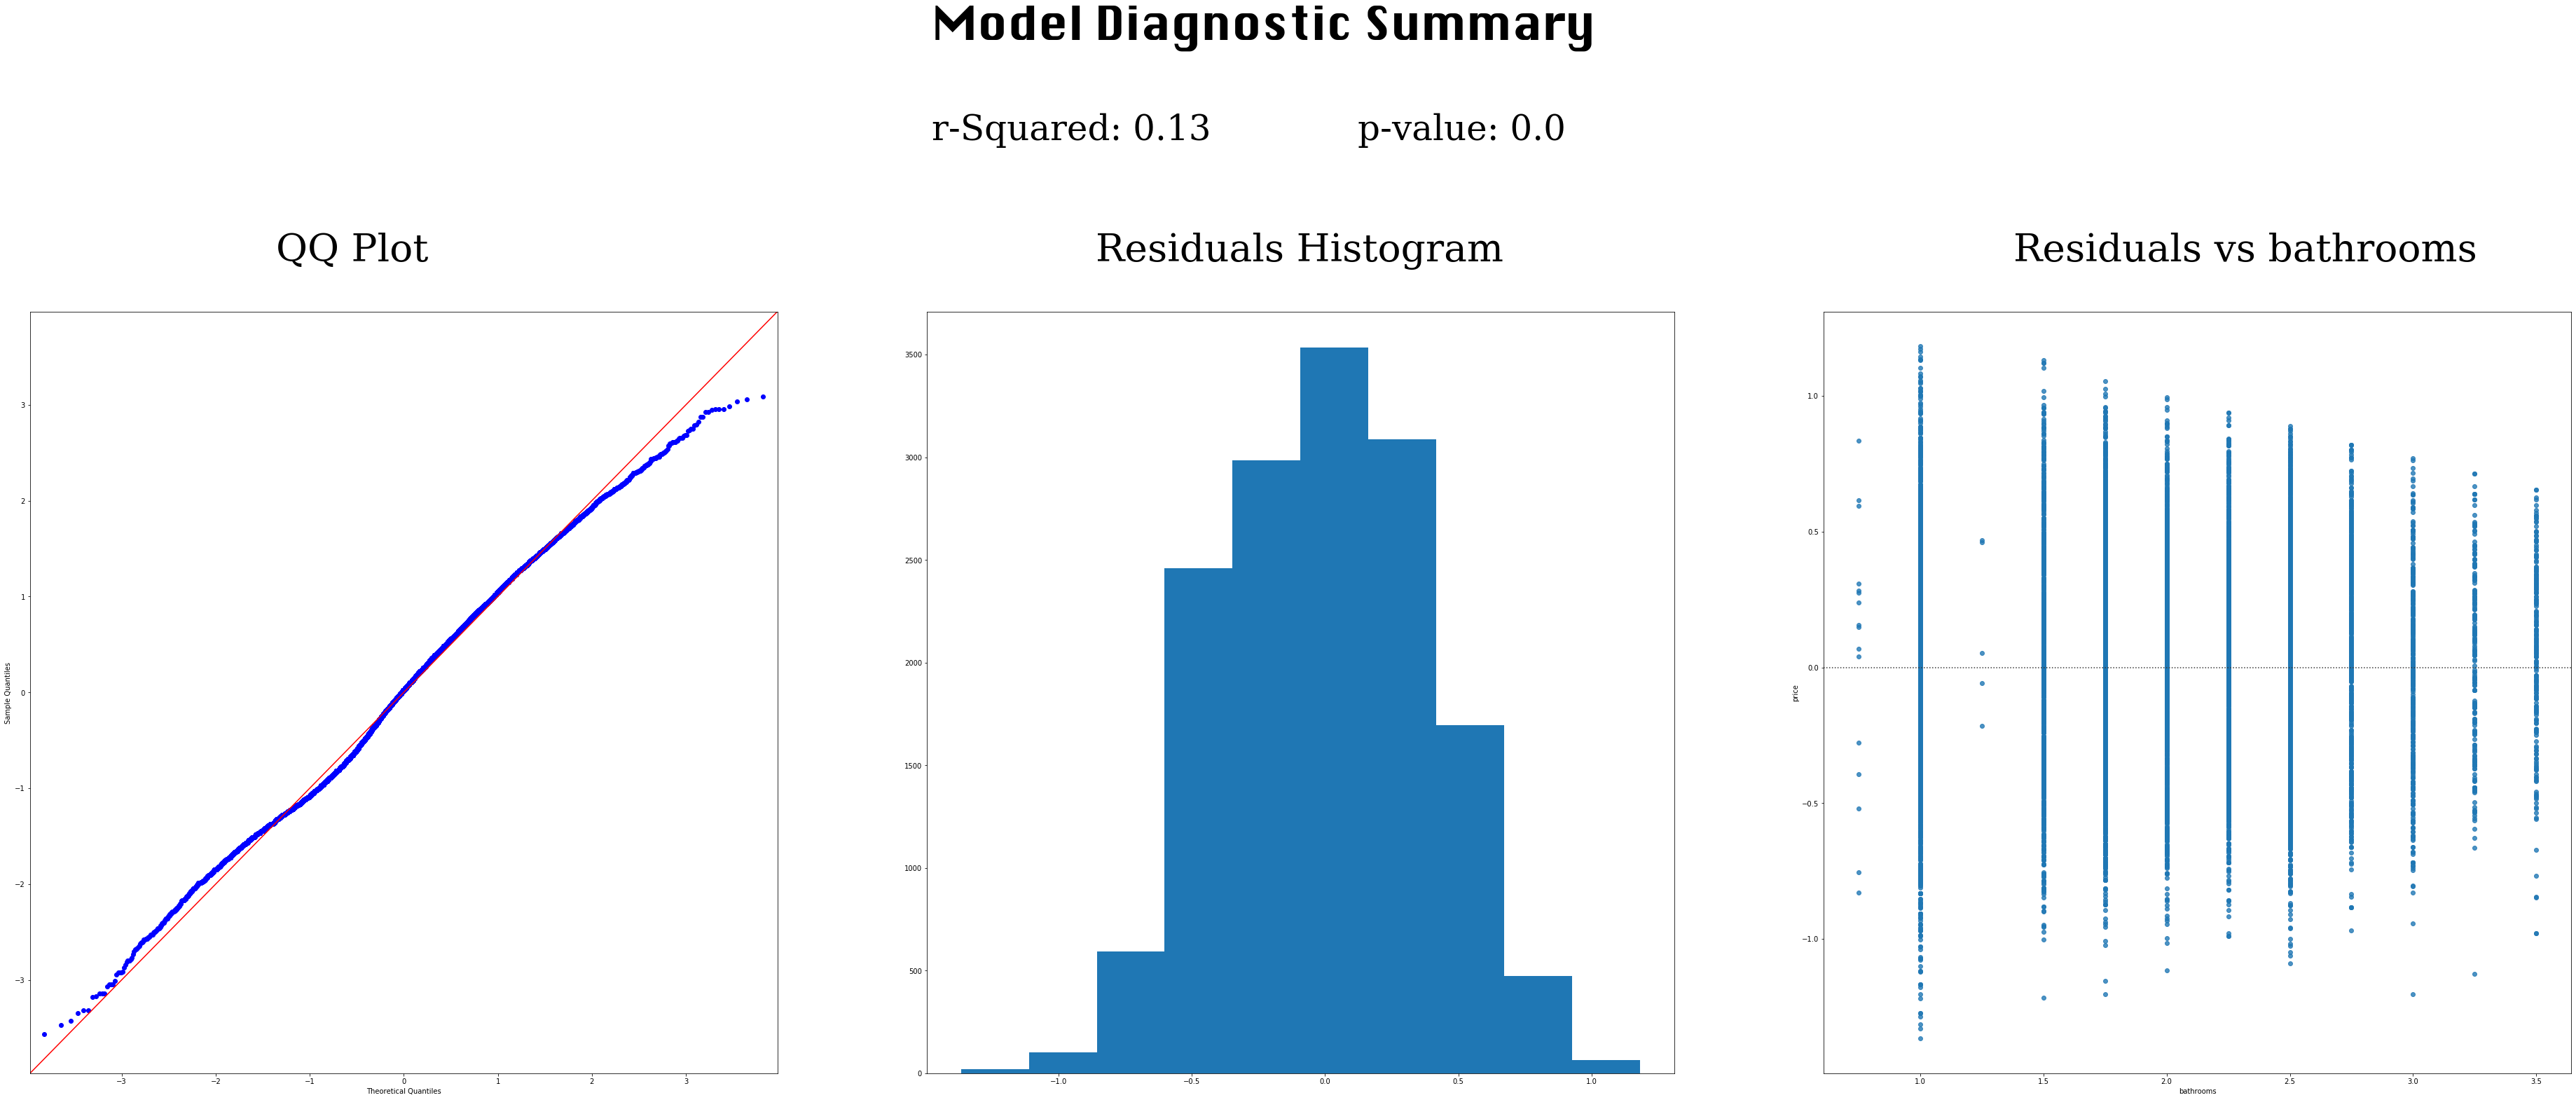

In [142]:
f = 'price~bathrooms'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["bathrooms"], 'bathrooms', feat["price"])

<Figure size 576x576 with 0 Axes>

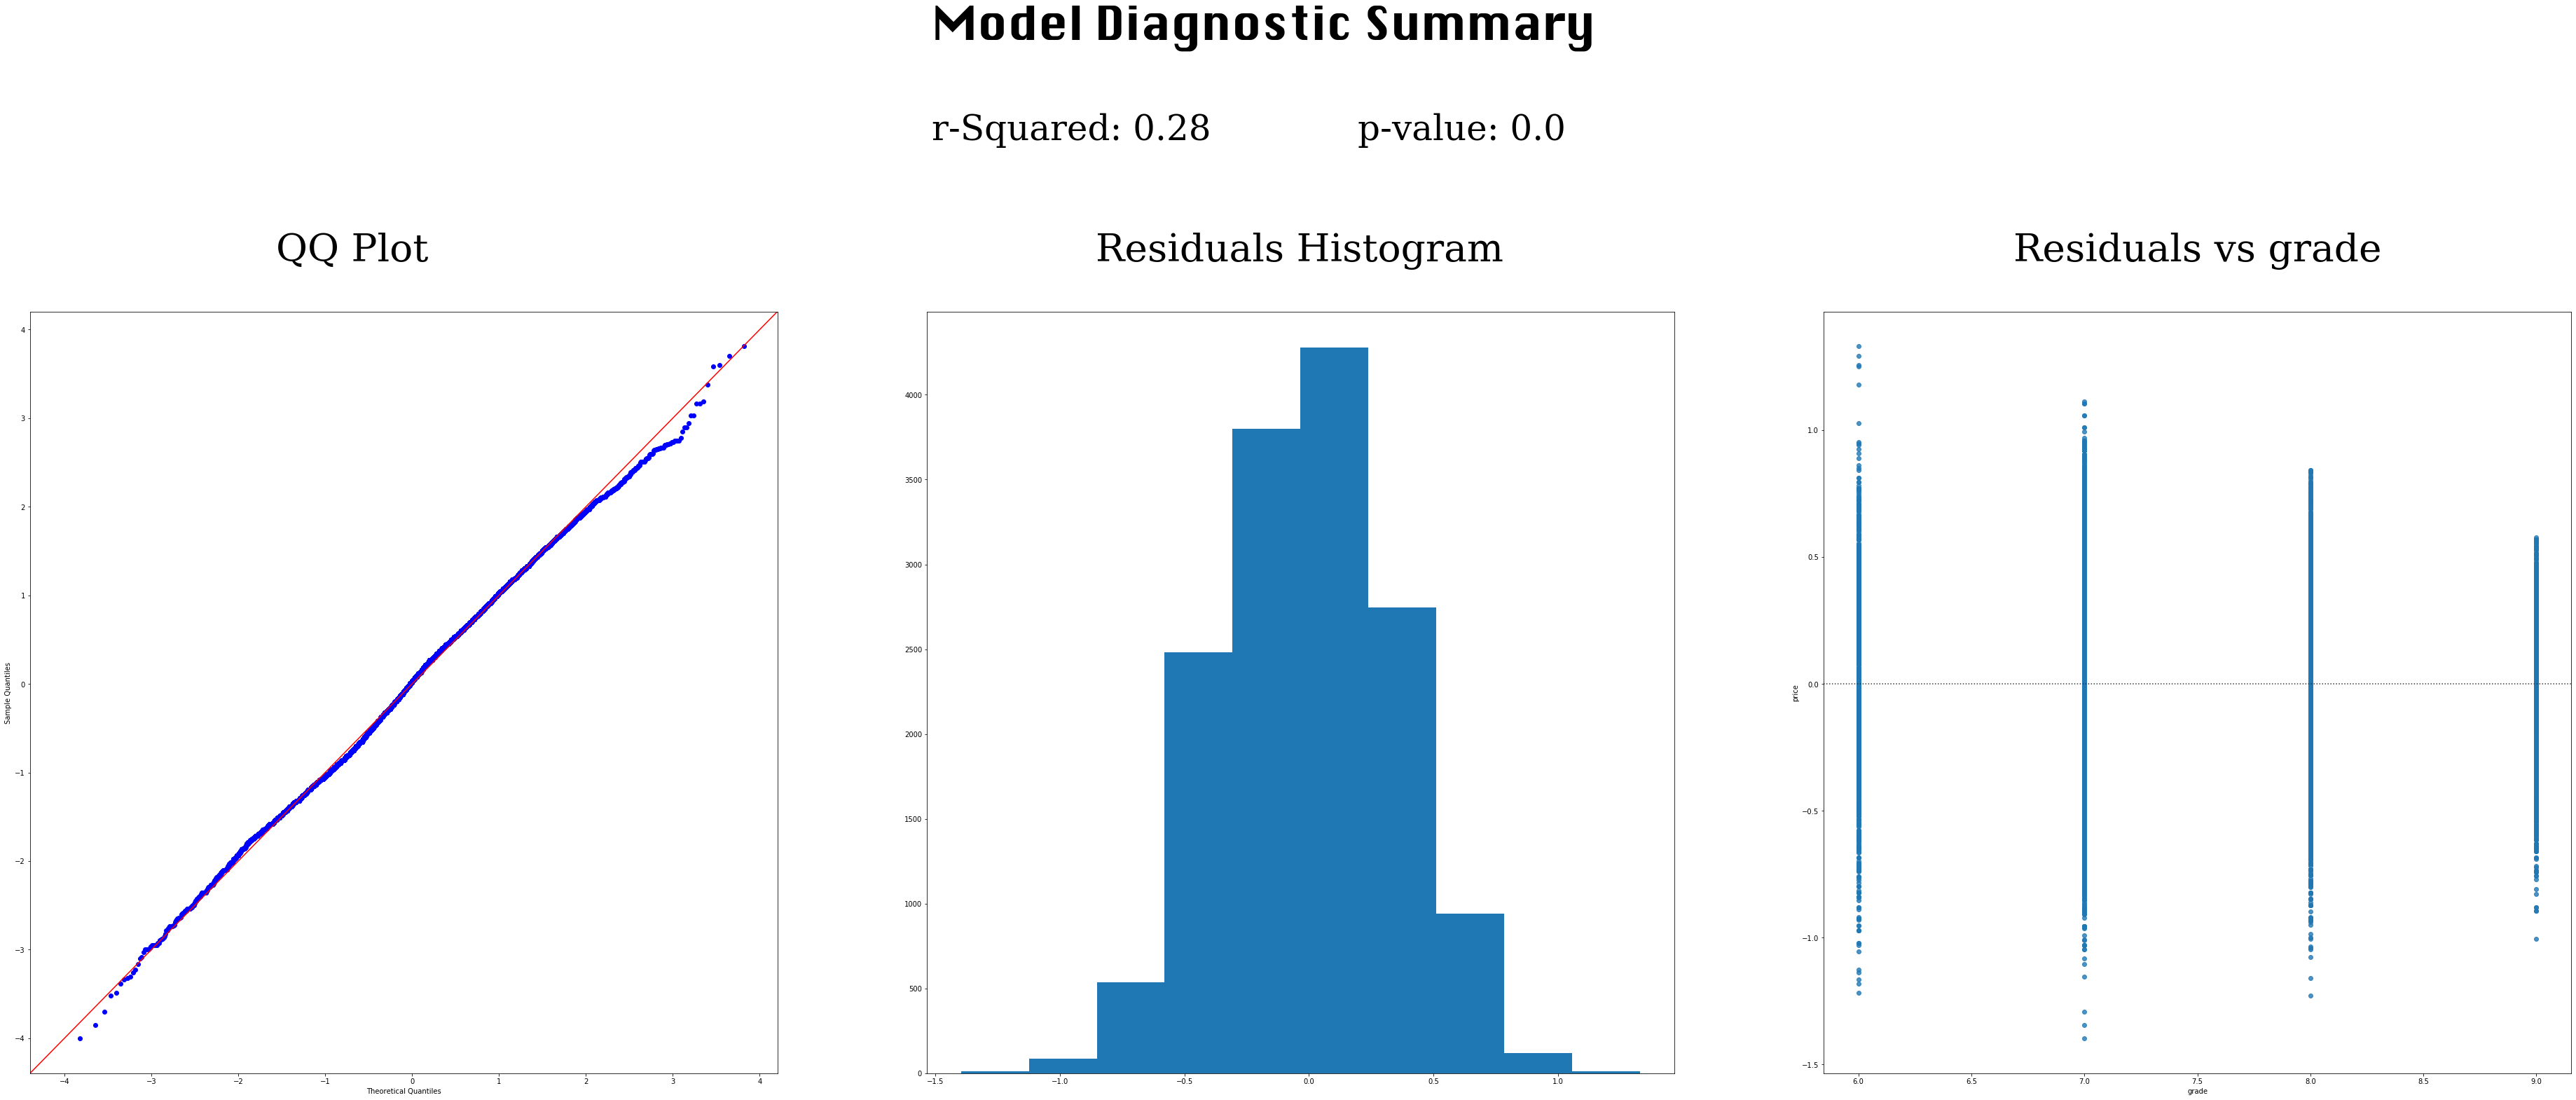

In [143]:
f = 'price~grade'
sqft_living_model = smf.ols(formula=f, data=feat).fit()
model_diagnostic(sqft_living_model, feat["grade"], 'grade', feat["price"])

 # Multiple Regression

## Model_1

First I decided to do a model including all the independent variables that I had identified as correlating with sales price and that met the assumptions (as described above) to see if that would be sufficient to generate a good predictive model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1982.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:33:49   Log-Likelihood:                -4817.2
No. Observations:               15013   AIC:                             9644.
Df Residuals:                   15008   BIC:                             9683.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.7839      0.097     80.355      0.000       7.594       7.974
bathrooms      -0.0510      0.006     -8.406      0.000      -0.063      -0.039
sqft_living     0.5160      0.015     35.338      0.000       0.487       0.545
grade           0.2114      0.005     45.197      0.000       0.202       0.221
sqft_above     -0.0001   7.89e-06    -14.080      0.000      -0.000   -9.56e-05
==============================================================================
Omnibus:                      109.829   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.325
Skew:                          -0.059   Prob(JB):                     9.81e-18
Kurtosis:                       2.666   Cond. No.                     6.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

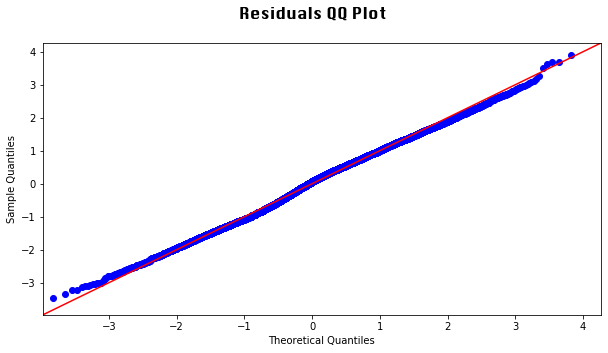

In [144]:
outcome = "price"

x_col =list(feat.iloc[:,1:6])
sqft_living15 =  "sqft_living15"
x_col.remove(sqft_living15)
predictors = "+".join(x_col)

formula = outcome +"~"+predictors     
Model_1 = smf.ols(formula=formula, data=feat).fit()
Model_1.summary()

residuals = Model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()
Model_1.summary()

## Model_2

In this model, I kept all the independent variables that I used on model 1 but in addition also included zip code as a categorical independent variable. I have choosen this variable because while exploring the data, I have had the sense that even though zip code did not correlate with price there was more to it than what meets the eye.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     899.2
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:33:49   Log-Likelihood:                 4565.2
No. Observations:               15013   AIC:                            -8984.
Df Residuals:                   14940   BIC:                            -8428.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.5076      0.057    167.176      0.000       9.396       9.619
bathrooms         0.0529      0.003     17.326      0.000       0.047       0.059
sqft_living15     0.2794      0.008     34.375      0.000       0.264       0.295
grade             0.0645      0.003     23.391      0.000       0.059       0.070
sqft_above        0.0002   3.97e-06     41.874      0.000       0.000       0.000
zipcode_98002     0.0244      0.017      1.396      0.163      -0.010       0.059
zipcode_98003     0.0354      0.016      2.204      0.028       0.004       0.067
zipcode_98004     1.1113      0.020     56.568      0.000       1.073       1.150
zipcode_98005     0.8372      0.021     39.569      0.000       0.796       0.879
zipcode_98006     0.7161      0.016     45.891      0.000       0.686       0.747
zipcode_98007     0.6992      0.020     34.440      0.000       0.659       0.739
zipcode_98008     0.7027      0.016     42.862      0.000       0.671       0.735
zipcode_98010     0.1942      0.032      6.042      0.000       0.131       0.257
zipcode_98011     0.4779      0.018     26.833      0.000       0.443       0.513
zipcode_98014     0.3690      0.034     10.717      0.000       0.302       0.437
zipcode_98019     0.3004      0.019     15.727      0.000       0.263       0.338
zipcode_98022     0.0472      0.020      2.344      0.019       0.008       0.087
zipcode_98023    -0.0011      0.014     -0.078      0.938      -0.028       0.026
zipcode_98024     0.4496      0.042     10.582      0.000       0.366       0.533
zipcode_98027     0.6045      0.017     35.916      0.000       0.572       0.637
zipcode_98028     0.4371      0.016     27.062      0.000       0.405       0.469
zipcode_98029     0.5811      0.015     37.593      0.000       0.551       0.611
zipcode_98030     0.0501      0.016      3.131      0.002       0.019       0.081
zipcode_98031     0.0857      0.016      5.434      0.000       0.055       0.117
zipcode_98032     0.0291      0.021      1.407      0.160      -0.011       0.070
zipcode_98033     0.7668      0.015     50.018      0.000       0.737       0.797
zipcode_98034     0.5567      0.014     40.705      0.000       0.530       0.584
zipcode_98038     0.1150      0.014      8.433      0.000       0.088       0.142
zipcode_98039     1.3037      0.074     17.634      0.000       1.159       1.449
zipcode_98040     0.9669      0.021     46.384      0.000       0.926       1.008
zipcode_98042     0.0453      0.014      3.264      0.001       0.018       0.073
zipcode_98052     0.6667      0.014     48.287      0.000       0.640       0.694
zipcode_98053     0.6267      0.016     38.013      0.000       0.594       0.659
zipcode_98055     0.1380      0.016      8.406      0.000       0.106       0.170
zipcode_98056     0.3549      0.015     23.762   

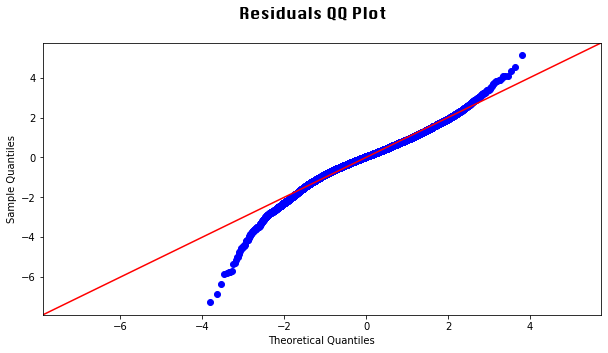

In [145]:
outcome = "price"
x_col =list(feat.iloc[:,1:])
sqft_living =  "sqft_living"
x_col.remove(sqft_living)
predictors = "+".join(x_col)

formula = outcome +"~"+predictors     
Model_2 = smf.ols(formula=formula, data=feat).fit()
residuals = Model_2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()
Model_2.summary()



In [146]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation <= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

Correlations                     Features
217      0.731745  [sqft_above, sqft_living15]
343      0.731745  [sqft_living15, sqft_above]
108      0.718200       [sqft_lot, sqft_lot15]
356      0.718200       [sqft_lot15, sqft_lot]
200      0.714061       [grade, sqft_living15]
..            ...                          ...
289     -0.347304          [zipcode, yr_built]
247     -0.361498        [yr_built, condition]
178     -0.361498        [condition, yr_built]
292     -0.564229              [zipcode, long]
329     -0.564229              [long, zipcode]

[370 rows x 2 columns]

## Model 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     899.2
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:33:49   Log-Likelihood:                 4565.2
No. Observations:               15013   AIC:                            -8984.
Df Residuals:                   14940   BIC:                            -8428.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.5076      0.057    167.176      0.000       9.396       9.619
bathrooms         0.0529      0.003     17.326      0.000       0.047       0.059
sqft_living15     0.2794      0.008     34.375      0.000       0.264       0.295
grade             0.0645      0.003     23.391      0.000       0.059       0.070
sqft_above        0.0002   3.97e-06     41.874      0.000       0.000       0.000
zipcode_98002     0.0244      0.017      1.396      0.163      -0.010       0.059
zipcode_98003     0.0354      0.016      2.204      0.028       0.004       0.067
zipcode_98004     1.1113      0.020     56.568      0.000       1.073       1.150
zipcode_98005     0.8372      0.021     39.569      0.000       0.796       0.879
zipcode_98006     0.7161      0.016     45.891      0.000       0.686       0.747
zipcode_98007     0.6992      0.020     34.440      0.000       0.659       0.739
zipcode_98008     0.7027      0.016     42.862      0.000       0.671       0.735
zipcode_98010     0.1942      0.032      6.042      0.000       0.131       0.257
zipcode_98011     0.4779      0.018     26.833      0.000       0.443       0.513
zipcode_98014     0.3690      0.034     10.717      0.000       0.302       0.437
zipcode_98019     0.3004      0.019     15.727      0.000       0.263       0.338
zipcode_98022     0.0472      0.020      2.344      0.019       0.008       0.087
zipcode_98023    -0.0011      0.014     -0.078      0.938      -0.028       0.026
zipcode_98024     0.4496      0.042     10.582      0.000       0.366       0.533
zipcode_98027     0.6045      0.017     35.916      0.000       0.572       0.637
zipcode_98028     0.4371      0.016     27.062      0.000       0.405       0.469
zipcode_98029     0.5811      0.015     37.593      0.000       0.551       0.611
zipcode_98030     0.0501      0.016      3.131      0.002       0.019       0.081
zipcode_98031     0.0857      0.016      5.434      0.000       0.055       0.117
zipcode_98032     0.0291      0.021      1.407      0.160      -0.011       0.070
zipcode_98033     0.7668      0.015     50.018      0.000       0.737       0.797
zipcode_98034     0.5567      0.014     40.705      0.000       0.530       0.584
zipcode_98038     0.1150      0.014      8.433      0.000       0.088       0.142
zipcode_98039     1.3037      0.074     17.634      0.000       1.159       1.449
zipcode_98040     0.9669      0.021     46.384      0.000       0.926       1.008
zipcode_98042     0.0453      0.014      3.264      0.001       0.018       0.073
zipcode_98052     0.6667      0.014     48.287      0.000       0.640       0.694
zipcode_98053     0.6267      0.016     38.013      0.000       0.594       0.659
zipcode_98055     0.1380      0.016      8.406      0.000       0.106       0.170
zipcode_98056     0.3549      0.015     23.762   

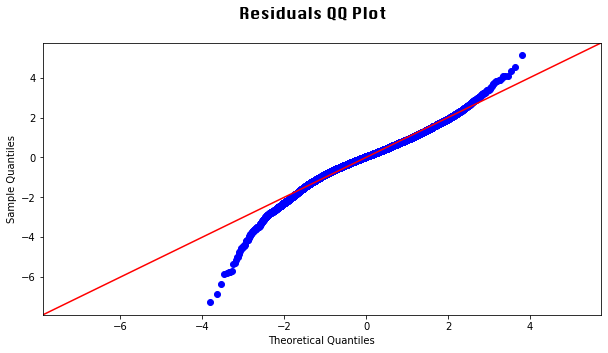

In [147]:
outcome = "price"

x_col =list(feat.iloc[:,1:])
sqft_living15 =  "sqft_living15"
sqft_living = "sqft_living"
x_col.remove(sqft_living15)
x_col.remove(sqft_living)
predictors = "+".join(x_col)

Model_3 = smf.ols(formula=formula, data=feat).fit()
Model_3.summary()

residuals = Model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()
Model_3.summary()

In [148]:
#create test and training data subsets
X_train, X_test, y_train, y_test = train_test_split(feat, feat.price)
train, test = train_test_split(feat,test_size=.25,shuffle=True)

In [149]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [150]:
#look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11259, 74) (11259,) (3754, 74) (3754,)


In [151]:
#fit the data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
#use the model to predict y values for the test and train data
y_pred_train = Model_2.predict(X_train)
y_pred_test = Model_2.predict(X_test)

In [153]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2

train_r2 = r2_score(train['price'], Model_2.predict(train))
test_r2 = r2_score(test['price'], Model_2.predict(test))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print(f'R-Squared Train = {round(train_r2,2)}')
print(f'R-Squared Test = {round(test_r2,2)}')


Mean Squared Error Train: 7.973465485388826e-08
Mean Squared Error Test: 7.172296246581423e-07
R-Squared Train = 0.81
R-Squared Test = 0.82


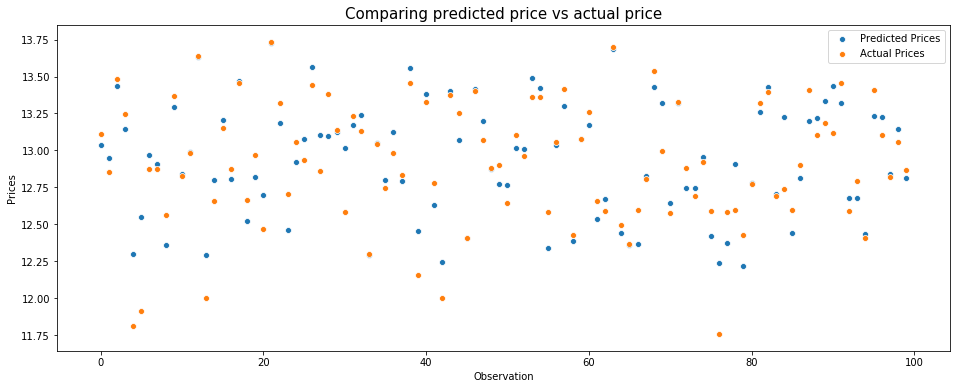

In [154]:
plt.figure(figsize=(16,6))
sns.scatterplot(range(len(y_pred_test[:100])), y_pred_test[:100], label='Predicted Prices')
sns.scatterplot(range(len(y_pred_test[:100])), y_test[:100], label='Actual Prices')
plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 15}), plt.xlabel('Observation'), plt.ylabel('Prices');

# Conclusions

From my analysis of the Kings County housing database I can conclude that:

    Doing renovations on a house leads to higher sales prices;

    The best features that predict price are the number of bathrooms, the square footage of living space, the grade attributed by Kings County to the house and how big houses in the nearby neighborhoods;

    The location of the house affects the sales price, however it is dependent on the particular zip code. Certain zip codes do not have any relationship with the sales price while others do;

    When thinking about renovating a house for sale the best features to focus on are increasing the number of bathrooms as well as increasing the square footage of the living space. Increasing the overall condition of the house is also important as it will result in increasing the grade attributed to the house by Kings County.

# CATEGORICAL_Model

In [155]:
## CATEGORICAL
df1 =df_outlier[['price', 'bathrooms', 'sqft_living', 'sqft_living15', 'grade',
       'sqft_above', 'condition', 'bedrooms']]
cat = pd.get_dummies(df1['condition'],prefix = "condition", drop_first=True) #drop a column to avoid dummy variable trap
df1 = df1.drop('condition',axis = 1)
df1 = df1.join(cat) 


cat = pd.get_dummies(df1['grade'],prefix = "grade", drop_first=True) #drop a column to avoid dummy variable trap
df1 = df1.drop('grade',axis = 1)
df1 = df1.join(cat) 


cat = pd.get_dummies(df1['bedrooms'], prefix = "bedrooms", drop_first=True) #drop a column to avoid dummy variable trap
df1 = df1.drop('bedrooms',axis = 1)
df1 = df1.join(cat)
df1

price  bathrooms  sqft_living  sqft_living15  sqft_above  \
0      12.309982       1.00         1180           1340        1180   
2      12.100712       1.00          770           2720         770   
3      13.311329       3.00         1960           1360        1050   
4      13.142166       2.00         1680           1800        1680   
6      12.458775       2.25         1715           2238        1715   
...          ...        ...          ...            ...         ...   
21592  12.793859       2.50         1530           1530        1530   
21593  12.899220       2.50         2310           1830        2310   
21594  12.904459       0.75         1020           1020        1020   
21595  12.899220       2.50         1600           1410        1600   
21596  12.691580       0.75         1020           1020        1020   

       condition_3  condition_4  condition_5  grade_7  grade_8  grade_9  \
0                1            0            0        1        0        0   
2                1            0            0        0        0        0   
3                0            0            1        1        0        0   
4                1            0            0        0        1        0   
6                1            0            0        1        0        0   
...            ...          ...          ...      ...      ...      ...   
21592            1            0            0        0        1        0   
21593            1            0            0        0        1        0   
21594            1            0            0        1        0        0   
21595            1            0            0        0        1        0   
21596            1            0            0        1        0        0   

       bedrooms_3  bedrooms_4  bedrooms_5  
0               1           0           0  
2               0           0           0  
3               0           1           0  
4               1           0           0  
6               1           0           0  
...           ...         ...         ...  
21592           1           0           0  
21593           0           1           0  
21594           0           0           0  
21595           1           0           0  
21596           0           0           0  

[15013 rows x 14 columns]

In [156]:
#from statsmodels.formula.api import ols
outcome = "price"


predictors = "+".join(df1.iloc[:,1:])

formula = outcome +"~"+ predictors
model = ols(formula= formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     717.6
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:33:50   Log-Likelihood:                -4370.7
No. Observations:               15013   AIC:                             8769.
Df Residuals:                   14999   BIC:                             8876.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1483      0.034    356.578      0.000      12.081      12.215
bathrooms        -0.0203      0.006     -3.386      0.001      -0.032      -0.009
sqft_living       0.0003   9.81e-06     29.544      0.000       0.000       0.000
sqft_living15  8.475e-05   8.11e-06     10.449      0.000    6.89e-05       0.000
sqft_above       -0.0001   8.73e-06    -15.494      0.000      -0.000      -0.000
condition_3       0.1124      0.033      3.451      0.001       0.049       0.176
condition_4       0.1814      0.033      5.539      0.000       0.117       0.246
condition_5       0.3205      0.034      9.521      0.000       0.255       0.387
grade_7           0.2255      0.010     23.672      0.000       0.207       0.244
grade_8           0.4201      0.011     36.603      0.000       0.398       0.443
grade_9           0.6198      0.016     39.837      0.000       0.589       0.650
bedrooms_3       -0.1185      0.009    -13.861      0.000      -0.135      -0.102
bedrooms_4       -0.1346      0.010    -12.841      0.000      -0.155      -0.114
bedrooms_5       -0.1270      0.015     -8.282      0.000      -0.157      -0.097
==============================================================================
Omnibus:                       49.475   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.447
Skew:                          -0.075   Prob(JB):                     6.06e-10
Kurtosis:                       2.787   Cond. No.                     7.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
pvalues = pd.DataFrame(model.pvalues, columns=['p'])
features = list(pvalues[pvalues.p < 0.05].index)
features.remove('Intercept')
features

outcome = 'price'
#predictors = df_final.drop(['price'], axis=1)
pred_sum = "+".join(features)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     717.6
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:33:51   Log-Likelihood:                -4370.7
No. Observations:               15013   AIC:                             8769.
Df Residuals:                   14999   BIC:                             8876.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1483      0.034    356.578      0.000      12.081      12.215
bathrooms        -0.0203      0.006     -3.386      0.001      -0.032      -0.009
sqft_living       0.0003   9.81e-06     29.544      0.000       0.000       0.000
sqft_living15  8.475e-05   8.11e-06     10.449      0.000    6.89e-05       0.000
sqft_above       -0.0001   8.73e-06    -15.494      0.000      -0.000      -0.000
condition_3       0.1124      0.033      3.451      0.001       0.049       0.176
condition_4       0.1814      0.033      5.539      0.000       0.117       0.246
condition_5       0.3205      0.034      9.521      0.000       0.255       0.387
grade_7           0.2255      0.010     23.672      0.000       0.207       0.244
grade_8           0.4201      0.011     36.603      0.000       0.398       0.443
grade_9           0.6198      0.016     39.837      0.000       0.589       0.650
bedrooms_3       -0.1185      0.009    -13.861      0.000      -0.135      -0.102
bedrooms_4       -0.1346      0.010    -12.841      0.000      -0.155      -0.114
bedrooms_5       -0.1270      0.015     -8.282      0.000      -0.157      -0.097
==============================================================================
Omnibus:                       49.475   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.447
Skew:                          -0.075   Prob(JB):                     6.06e-10
Kurtosis:                       2.787   Cond. No.                     7.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""